In [1]:
import numpy as np

## Worksheet 1
***

1.  Define the global variables: quantum states ${|0\rangle}$ and ${|1\rangle}$  as vectors.

In [2]:
e_0 = np.array([[1],[0]])
e_1 = np.array([[0],[1]])

state_0 = np.array([[1],[0]])
state_1 = np.array([[0],[1]])


2.  Define the global variables: quantum states ${|+\rangle}$ and ${|-\rangle}$  as vectors.

In [3]:
hadamard_gate = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],
                          [1/np.sqrt(2), -1/np.sqrt(2)]])
state_plus = hadamard_gate @ e_0
state_minus = hadamard_gate @ e_1

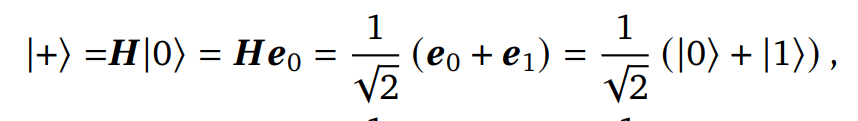

In [4]:
state_plus == (1/np.sqrt(2) * (state_0 + state_1))

array([[ True],
       [ True]])

In [5]:
np.kron(state_plus, e_0) 

array([[0.70710678],
       [0.        ],
       [0.70710678],
       [0.        ]])

3. Write a function which checks if a given quantum state is normalized.

In [6]:
def check_if_valid_quantum_state(state):
    normalization = np.abs(state[0]) ** 2 + np.abs(state[1]) ** 2
    return True if np.isclose(normalization, 1) else False

4. Write a function calculating the probability of measuring 0 given a quantum state.

In [7]:
def calculate_prob_o0(state):
    return np.abs(state[0]) ** 2

5. Write a function calculating the probability of measuring 1 given a quantum state.

In [8]:
def calculate_prob_o1(state):
    return 1 - np.abs(state[0]) ** 2

1.  Define the global variables: quantum operation (gates) identity $\mathbb I$,  sign flip ${\mathbf Z}$, bit flip $\mathbf X$, Hadamard $\mathbf H$, as matrices. 

In [9]:
I = np.array([[1,0],[0,1]])
Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
H = np.array([[1,1],[1,-1]]) / np.sqrt(2)

![image.png](attachment:image.png)

In [10]:
np.round(np.linalg.matrix_power(H, 2), 5)

array([[ 1., -0.],
       [-0.,  1.]])

2. Write a function which checks if a given matrix is a valid quantum operation.

In [11]:
def check_if_valid_quantum_gate(gate): # checks if this is its own inverse
    normalization = np.linalg.norm(gate @ gate.conj().T - np.eye(2))
    return True if np.isclose(normalization, 0) else False

In [12]:
U = np.array([[1j, -1j], [-1j, 1j]]) / np.sqrt(2)
check_if_valid_quantum_gate(U)

False

In [13]:
U = np.array([
    [0.09957848 - 0.22500271j, -0.87803531 - 0.38839567j],
    [0.20514571 - 0.94940827j,  0.241228   + 0.0484886j ]
])
check_if_valid_quantum_gate(U)

False

In [14]:
U = np.array([
    [0.86114448 - 0.0448945j,  0.31606599 - 0.39562224j],
    [-0.0131393 - 0.50620354j,  0.65941701 + 0.55565685j]
])
check_if_valid_quantum_gate(U)

True

3. Write a function which applies a general quantum gate to a general quantum state. Return the resulting state.

In [15]:
def apply_gate(gate, state):
  return gate @ state

4. Write a function which takes a list of quantum gates (as matrices) and returns a single gate (matrix) which is the composite of the given ones.

In [16]:
def concatenate_gates(gates_list):
  final_gate = np.array([[1,0], [0,1]])
  for gate in gates_list[::-1]:
    final_gate = gate @ final_gate
  return final_gate

Apply one of the single qubit gates you have seen so far to one of the quantum states you have implemented already.

Apply the Hadamard gate to the $|0\rangle$  state and calculate the probability to measure an outcome $0$?
What is the probability of measuring an outcome $1$?
Can you interpret this quantum circuit as a random number generator?
Does it work with another gate? What about a different state?

In [17]:
calculate_prob_o0(I @ state_0), calculate_prob_o1(H @ state_1)

(array([1]), array([0.5]))

In [18]:
I @ H @ state_0

array([[0.70710678],
       [0.70710678]])

## Worksheet 2
***

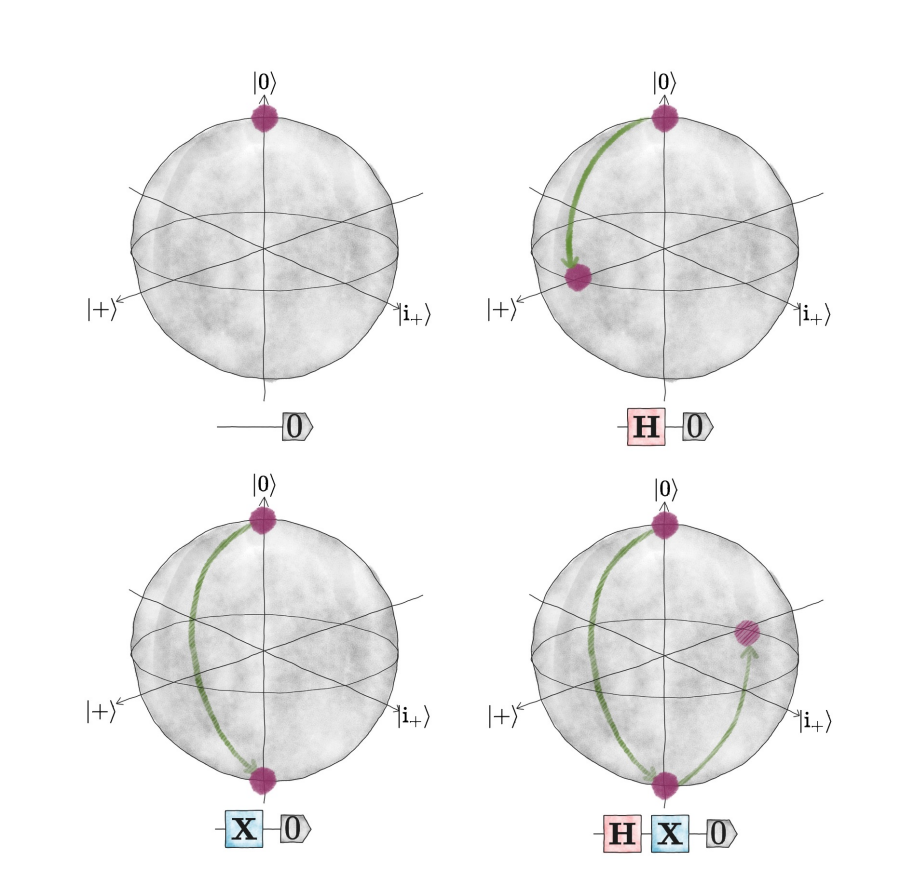

In [19]:
H @ state_0, X @ state_0, H @ X @ state_0

(array([[0.70710678],
        [0.70710678]]),
 array([[0],
        [1]]),
 array([[ 0.70710678],
        [-0.70710678]]))

In [20]:
from scipy.linalg import expm, sinm, cosm


2.  Define the global variables: quantum states ${|\mathrm i_+\rangle}$ and ${|\mathrm i_-\rangle}$ as vectors.

In [21]:
state_i_plus = (1 / np.sqrt(2)) * np.array([1, 1j])
state_i_minus = (1 / np.sqrt(2)) * np.array([1, -1j])
state_i_plus

array([0.70710678+0.j        , 0.        +0.70710678j])

In [22]:
np.kron(state_plus, state_i_plus)

array([[0.5+0.j , 0. +0.5j],
       [0.5+0.j , 0. +0.5j]])

3.  Define the global variables: quantum operation (gates) Pauli $\mathbf Y$ rotation, square root of sign flip ${\mathbf S}$, T-gate $\mathrm T$

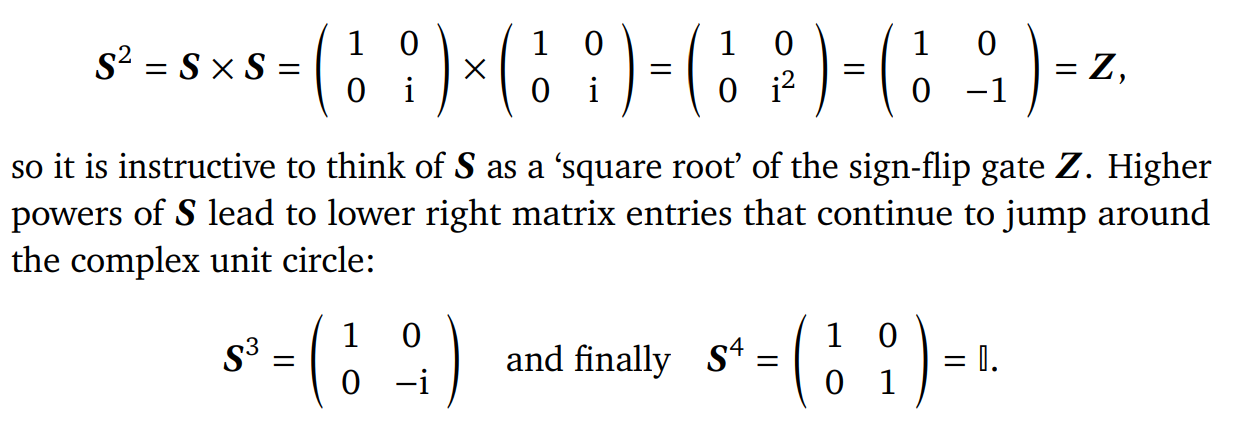

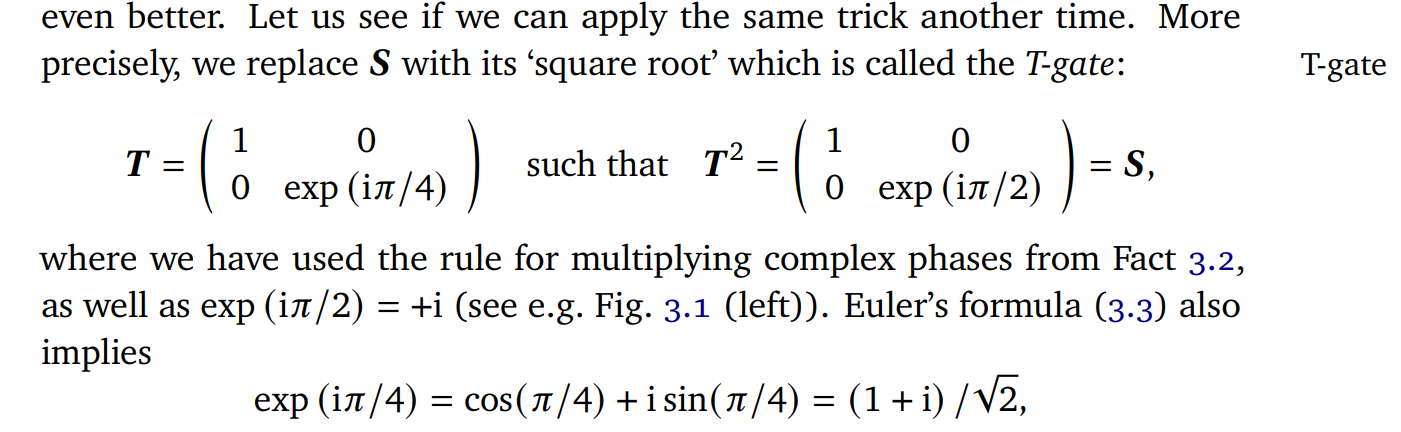

In [23]:
Y = np.array([[0, -1j],[1j, 0]])
# Define the S-gate (square root of Z gate)
S = np.array([[1, 0], [0, 1j]])

# Define the T-gate (π/8 gate)
T = np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]])

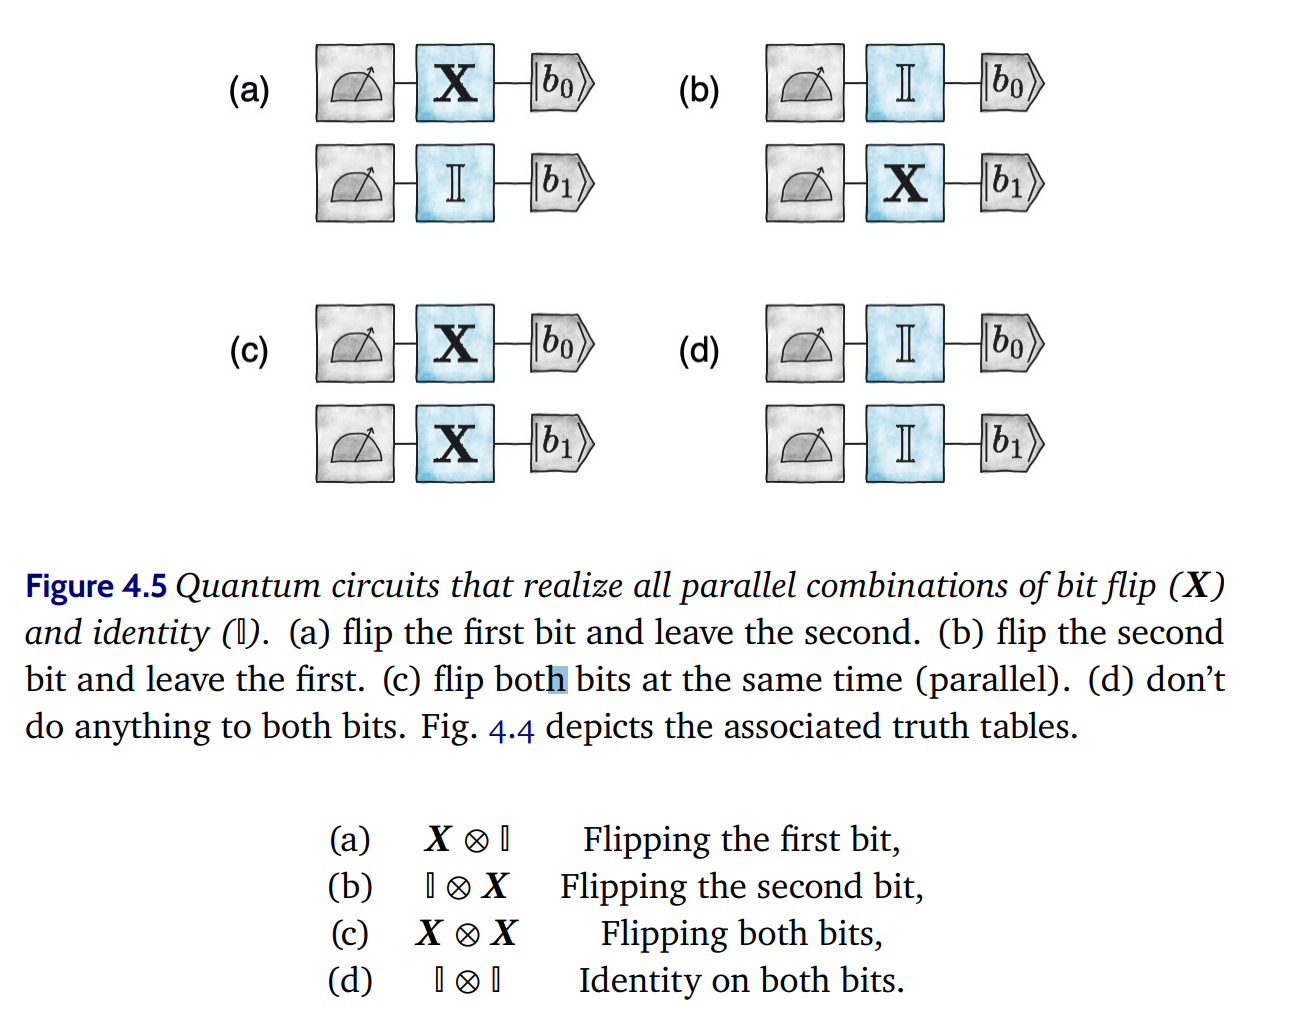

In [24]:
np.kron(X, I) @ np.kron(state_0, state_0), np.kron(state_0, state_0)

(array([[0],
        [0],
        [1],
        [0]]),
 array([[1],
        [0],
        [0],
        [0]]))

In [25]:
np.kron(T, np.eye(2)) @ np.kron(e_1, e_0)

array([[0.        +0.j        ],
       [0.        +0.j        ],
       [0.70710678+0.70710678j],
       [0.        +0.j        ]])

In [26]:
CNOT_01 = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
CNOT_01

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

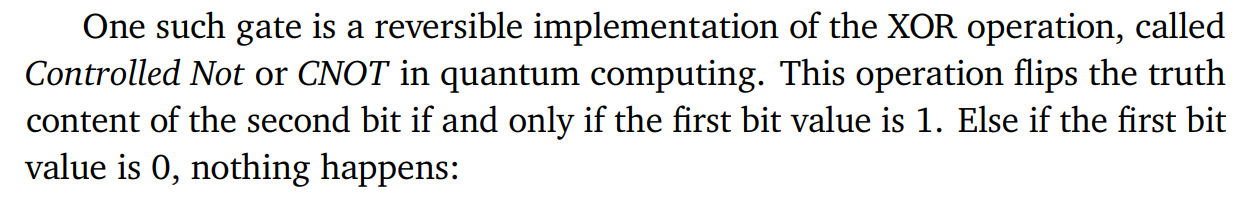

In [27]:
CNOT_01 @ np.kron(state_0, state_0), np.kron(state_0, state_0)

(array([[1],
        [0],
        [0],
        [0]]),
 array([[1],
        [0],
        [0],
        [0]]))

In [28]:
CNOT_01 @ np.kron(state_1, state_0), np.kron(state_1, state_0)

(array([[0],
        [0],
        [0],
        [1]]),
 array([[0],
        [0],
        [1],
        [0]]))

4.  Define a function that returns a $\mathrm X$-, $\mathrm Y$-,  or $\mathrm Z$-rotation by the rotation angle $\theta$ (it can also be three functions representing $\mathrm R_X$, $\mathrm R_Y$ and $\mathrm R_Z$)

In [29]:
def R_X(theta):
    return expm(-1j * theta / 2 * X)

def R_Y(theta):
    return expm(-1j * theta / 2 * Y)

def R_Z(theta):
    return expm(-1j * theta / 2 * Z)

In [30]:
R_X(0)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [31]:
R_Y(np.pi)# @ R_Y(np.pi/6) @ R_Y(np.pi/3)

array([[ 6.123234e-17+0.j, -1.000000e+00+0.j],
       [ 1.000000e+00+0.j,  6.123234e-17+0.j]])

5.  Define a function checking if matrices are commuting.

In [32]:
def are_commuting(A, B):
    commutator = np.dot(A, B) - np.dot(B, A)
    return np.allclose(commutator, np.zeros_like(commutator))

In [33]:
S.conj().T

array([[1.-0.j, 0.-0.j],
       [0.-0.j, 0.-1.j]])

In [34]:
are_commuting(S @ H @ Z @ H @ S.conj().T, R_Y(-np.pi/2))

True

In [35]:
np.kron(H, S).T == np.kron(S.T, H.T)

array([[ True, False, False,  True],
       [False, False,  True, False],
       [False,  True, False, False],
       [ True, False, False,  True]])

1.  Write a function which simulates the action of a student. This function should take a rational number, $k$, and the quantum state received from the previous student as input. The output should be the updated quantum state (which this student will then send forward).

In [36]:
def student_act_on_q_state(q_state, k):
  RY = R_Y(np.pi * k)
  return apply_gate(RY, q_state)

2. Using this function, simulate the whole game with D=3 students for different numbers, $k$, use for example:

In [37]:
state_0 = e_0

In [38]:
k_tot = 493 # Hidden from students
k_list = [k_tot/3, 7 * k_tot /15, k_tot /5] # Each student gets one number.
pass_around_state = state_0 # Start always with zero state.
print(f"Initial state looks like: \n{np.round(pass_around_state,5)}")
for count, k in enumerate(k_list):
  pass_around_state = student_act_on_q_state(pass_around_state, k)
  print(f"{count + 1}. students quantum state looks like: \n{np.round(pass_around_state,5)}")
print(f"True parity of k_tot: {k_tot % 2}")

Initial state looks like: 
[[1]
 [0]]
1. students quantum state looks like: 
[[0.86603+0.j]
 [0.5    +0.j]]
2. students quantum state looks like: 
[[-0.80902+0.j]
 [-0.58779+0.j]]
3. students quantum state looks like: 
[[0.+0.j]
 [1.+0.j]]
True parity of k_tot: 1


In [39]:
U_1 = np.array([[.95105652, -.30901699], [.30901699, .95105652]]) * np.sqrt(6)
check_if_valid_quantum_gate(U_1)

False

In [40]:
np.linalg.norm(np.array([.83666003, .54772256]))

1.000000004266277

In [41]:
def check_normalized(state):
    norm = np.dot(state, state.conj)
    return np.isclose(norm, 1)
    # return np.linalg.norm(state) == 1

In [42]:
U = np.array([[.89100652, -.4539905],
            [.4539905, .89100652]])


In [43]:
def calculate_prob_o0(state):
    return np.abs(state[0]) ** 2

np.round(calculate_prob_o0(U @ state_plus ), 3)

array([0.095])

In [44]:
A = [[1, 1j, 1+3j],[0, 0.5, 1-3.5j]]
B = [[1, 0],[-1j, 5]]
import pandas as pd
pd.DataFrame(np.kron(A, B))

C:\Users\Micha\AppData\Local\Temp\ipykernel_16344\1460320947.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


0         1         2         3         4          5
0  1.0+0.0j  0.0+0.0j  0.0+1.0j  0.0+0.0j  1.0+3.0j  0.0+ 0.0j
1  0.0-1.0j  5.0+0.0j  1.0-0.0j  0.0+5.0j  3.0-1.0j  5.0+15.0j
2  0.0+0.0j  0.0+0.0j  0.5+0.0j  0.0+0.0j  1.0-3.5j  0.0+ 0.0j
3  0.0-0.0j  0.0+0.0j  0.0-0.5j  2.5+0.0j -3.5-1.0j  5.0-17.5j

In [45]:
# check_normalized(state_plus)

In [46]:
def check_prob_is_zero(state):
    return np.abs(np.inner(e_0.T, state)) ** 2

In [47]:
def check_prob_is_one(state):
    return np.abs(np.inner(e_1.T , state)) ** 2

## Worksheet 3
***

1.  Define a function that takes 2 matrices and outputs its Kronecker product.  Be careful with the ordering!

In [48]:
def calculate_kron_product(A, B):
  m, n = np.shape(A)
  p, q = np.shape(B)

  K = np.empty((p*m, q*n), dtype=complex)
  
  for i in range(m):  # rows
    for j in range(n):  # columns
        K[i*p:(i+1)*p, j*q:(j+1)*q] = A[i, j] * B

  return K

2.  Use the same function to produce a quantum state of two qubits. 

In [49]:
calculate_kron_product(state_0, state_0)

array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

1.  Define a function which takes 2 quantum states and outputs the Kronecker product join quantum state.

In [50]:
def create_2_qubits_state(psi1, psi2):
  return calculate_kron_product(psi1, psi2)


2.  Define a function which takes 2 unitary matrices acting on separate quantum states and outputs a single unitary matrix acting on the joined space. Be careful with dimensions!

In [51]:
# testing it with the example of the lecture notes, eq.(4.4):
result = 1/np.sqrt(2)*np.array([[1, 0, 1, 0],
                  [0, -1, 0, -1],
                  [1, 0, -1, 0],
                  [0, -1, 0, 1]])

def create_q_gate_on_2_qubits(A, B):
  return calculate_kron_product(A, B)
  #return np.kron(A, B)
 
np.isclose(create_q_gate_on_2_qubits(H, Z), result)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

3. Define the CNOT gate.

In [52]:

CNOT_01 = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])


1.  Define a function that takes a 4x1 vector representing a quantum state on 2 qubits and returns the probability to measure 00, 01, 10 and 11. 

In [53]:

def calculate_measurement_probabilitites(psi):
  return [np.abs(psi[0]) ** 2, np.abs(psi[1]) ** 2, np.abs(psi[2]) ** 2, np.abs(psi[3]) ** 2]
  
# check with for example:
calculate_measurement_probabilitites(psi=np.kron(state_plus, state_plus))


[array([0.25]), array([0.25]), array([0.25]), array([0.25])]

1.  Define a function that takes a 4x1 vector representing a quantum state on 2 qubits and returns the probability to measure 00, 01, 10 and 11. 

In [54]:
def calculate_measurement_probabilitites(psi):
  return [np.abs(psi[0]) ** 2, np.abs(psi[1]) ** 2, np.abs(psi[2]) ** 2, np.abs(psi[3]) ** 2]
  
# check with for example:
calculate_measurement_probabilitites(psi=np.kron(state_plus, state_plus))

[array([0.25]), array([0.25]), array([0.25]), array([0.25])]

## Worksheet 4
***

1.   Define the global variables: 2-qubit bell states ${|\psi_{\text{Bell}}(0,0)\rangle}$, ${|\psi_{\text{Bell}}(0,1)\rangle}$, ${|\psi_{\text{Bell}}(1,0)\rangle}$, and ${|\psi_{\text{Bell}}(1,1)\rangle}$  as vectors.

In [55]:
create_2_qubits_state(state_0, state_0)

array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

In [56]:
bell_state_00 = CNOT_01 @ create_q_gate_on_2_qubits(H, I) @ create_2_qubits_state(state_0, state_0)
bell_state_01 = CNOT_01 @ create_q_gate_on_2_qubits(H, I) @ create_2_qubits_state(state_0, state_1)
bell_state_10 = CNOT_01 @ create_q_gate_on_2_qubits(H, I) @ create_2_qubits_state(state_1, state_0)
bell_state_11 = CNOT_01 @ create_q_gate_on_2_qubits(H, I) @ create_2_qubits_state(state_1, state_1)

In [57]:
bell_state_00, bell_state_01

(array([[0.70710678+0.j],
        [0.        +0.j],
        [0.        +0.j],
        [0.70710678+0.j]]),
 array([[0.        +0.j],
        [0.70710678+0.j],
        [0.70710678+0.j],
        [0.        +0.j]]))

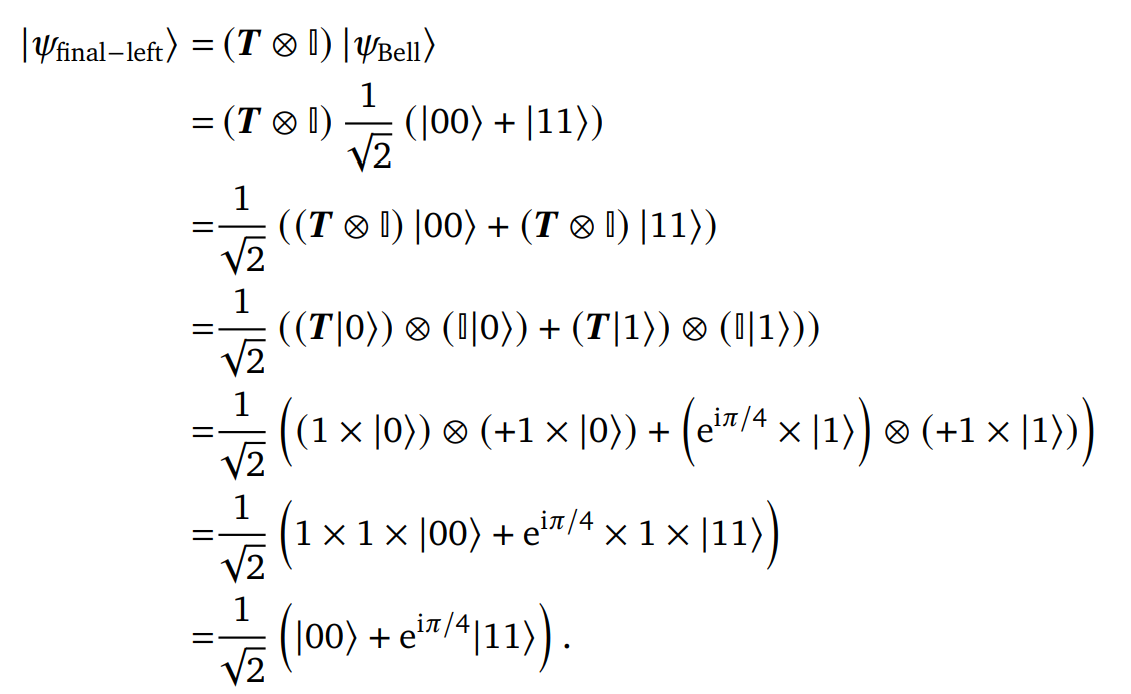

In [58]:
create_q_gate_on_2_qubits(T, I) @ bell_state_00

array([[0.70710678+0.j ],
       [0.        +0.j ],
       [0.        +0.j ],
       [0.5       +0.5j]])

2.  Define the global variable: 2-qubit Bell basis measurement gate

In [59]:
Bell_Measurement_Gate = create_q_gate_on_2_qubits(H, I) @ CNOT_01

3.  Define a function that takes in a ket vector $|\psi\rangle$ and returns its dual version (bra) $\langle\psi|$. Define another function that turns a dual vector (bra) into its ket version.

In [60]:
def to_dual(ket):
  return np.array(ket).flatten().conj()

def to_ket(bra):
  return np.array(bra)[...,None].conj()

to_dual(np.array([[1], [0]])), to_ket(np.array([1, 0]))

(array([1, 0]),
 array([[1],
        [0]]))

Write a function that checks if a given set of vectors forms an orthonormal basis.

In [61]:
def check_if_orthonormal(vector_list):
  for count1, v1 in enumerate(vector_list):
    for count2, v2 in enumerate(vector_list):
      overlap = to_dual(v1) @ v2
      if np.isclose(overlap, 0) and count1 != count2:
        continue
      elif np.isclose(overlap, 1) and count1 == count2:
        continue
      else:
        return False
  return True

1.  We need an entangled state. In the protocol, Charlie provides this state. In our version, this is the first Bell state. Charlie sends one qubit to Alice and the other one to Bob. We cannot simulate that, so a function that returns the initial state should be enough. 

In [62]:
def init_entangled_state():
  return bell_state_00

2. Alice chooses which 2 bits to send and applies the respective quantum operations on her part of the entangled state. Then she sends her qubit to Bob.

In [63]:
def message_encoding(initial_state, sending_bits:str):
  gate = np.linalg.matrix_power(Z, int(sending_bits[0])) @ np.linalg.matrix_power(X, int(sending_bits[1]))
  return create_q_gate_on_2_qubits(gate, I) @ initial_state

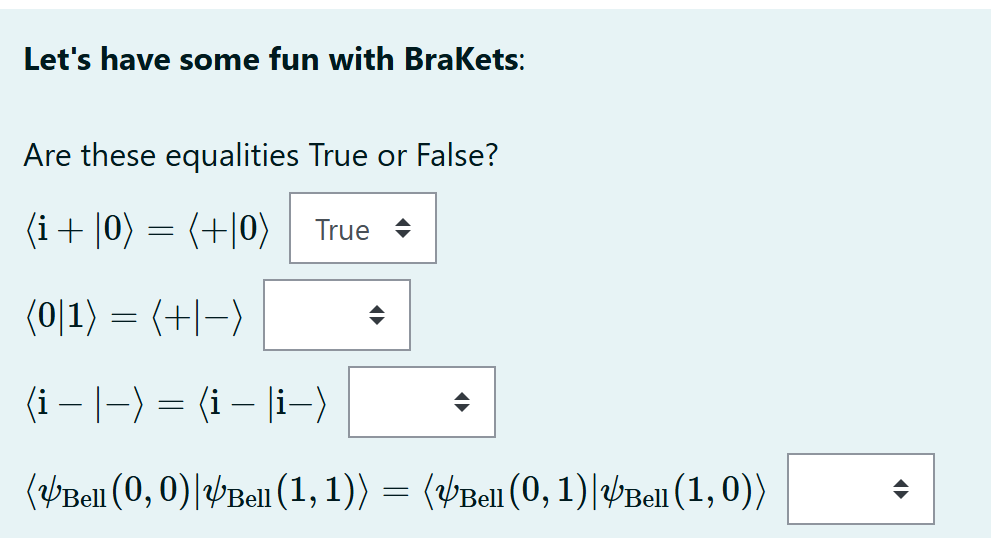

In [64]:
(state_i_plus @ state_0) == (to_dual(state_plus) @ state_0)

array([ True])

In [65]:
(to_dual(state_0) @ state_1) == (to_dual(state_plus) @ state_minus)

array([ True])

In [66]:
(state_i_minus @ state_minus) == state_i_minus @ to_ket(state_i_minus)

array([False])

In [67]:
(to_dual(bell_state_00) @ bell_state_11) == (to_dual(bell_state_01) @ bell_state_10)  

array([ True])

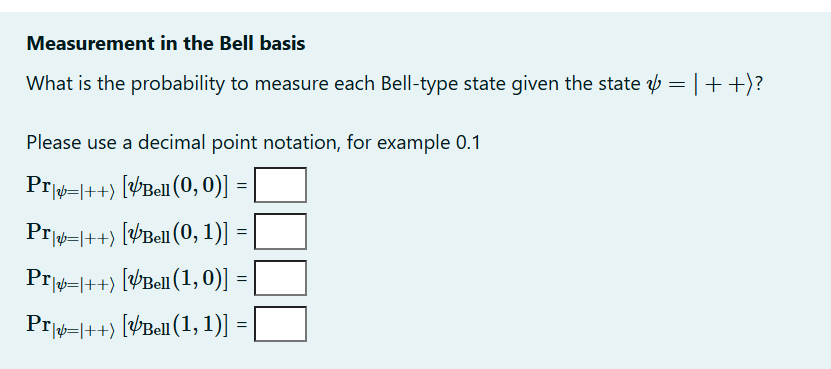

In [68]:
(to_dual(np.kron(state_0, state_0)) @ bell_state_00) ** 2

array([0.5+0.j])

In [69]:
(np.abs(to_dual(np.kron(state_plus, state_plus)) @ bell_state_00)) ** 2

array([0.5])

In [70]:
(np.abs(to_dual(np.kron(state_plus, state_plus)) @ bell_state_01)) ** 2

array([0.5])

In [71]:
(np.abs(to_dual(np.kron(state_plus, state_plus)) @ bell_state_10)) ** 2

array([0.])

In [72]:
(np.abs(to_dual(np.kron(state_plus, state_plus)) @ bell_state_11)) ** 2

array([0.])

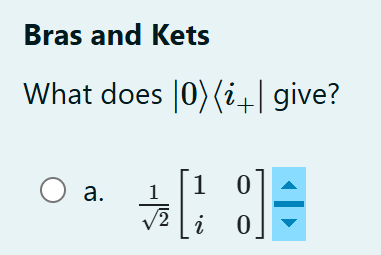

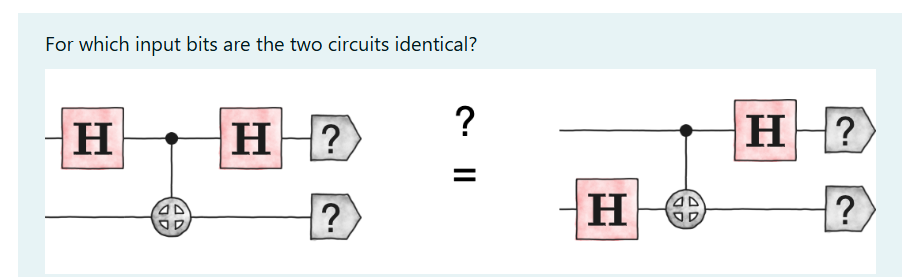

In [75]:
np.kron(H, I) @ bell_state_00 == np.kron(I, H) @ bell_state_00

array([[ True],
       [ True],
       [ True],
       [ True]])

In [76]:
np.kron(H, I) @ bell_state_01 == np.kron(I, H) @ bell_state_01

array([[ True],
       [False],
       [False],
       [ True]])

In [77]:
np.kron(H, I) @ bell_state_10 == np.kron(I, H) @ bell_state_10

array([[ True],
       [False],
       [False],
       [ True]])

In [78]:
np.kron(H, I) @ bell_state_11 == np.kron(I, H) @ bell_state_11

array([[False],
       [False],
       [False],
       [False]])

In [79]:
np.kron(H, I) @ bell_state_01, np.kron(H, I) @ bell_state_10, np.kron(H, I) @ bell_state_11

(array([[ 0.5+0.j],
        [ 0.5+0.j],
        [-0.5+0.j],
        [ 0.5+0.j]]),
 array([[ 0.5+0.j],
        [-0.5+0.j],
        [ 0.5+0.j],
        [ 0.5+0.j]]),
 array([[-0.5+0.j],
        [ 0.5+0.j],
        [ 0.5+0.j],
        [ 0.5+0.j]]))

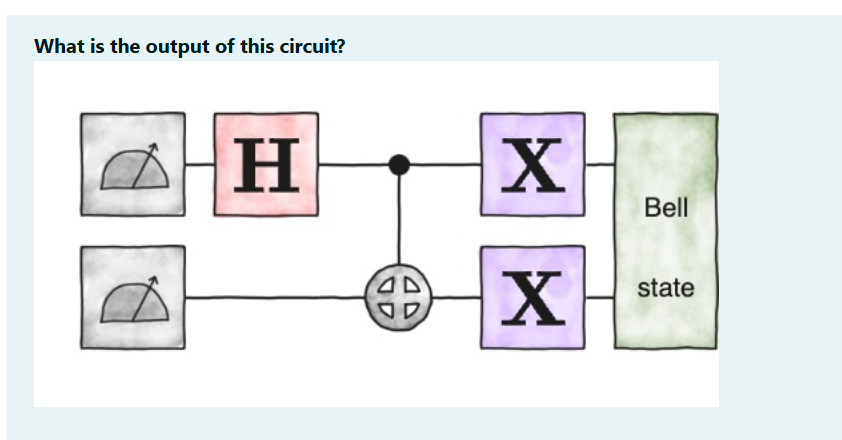

In [80]:
np.kron(H, I) @ CNOT_01 @ np.kron(X, X) @ bell_state_00

array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

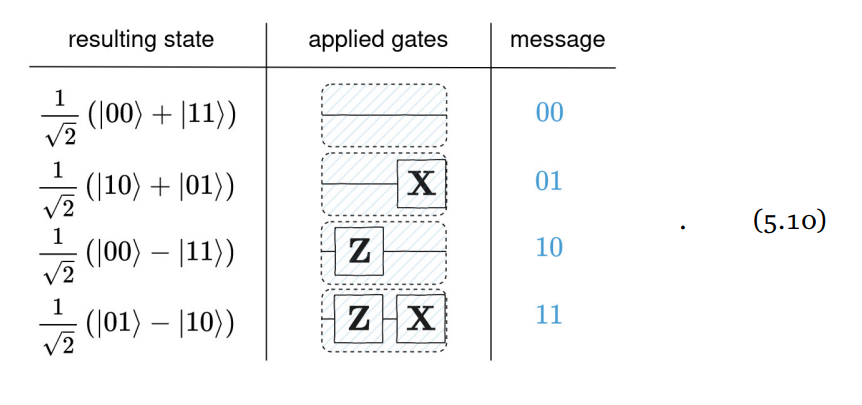

In [81]:
message_00_enc = (np.kron(state_0, state_0) + np.kron(state_1, state_1)) / np.sqrt(2)
message_01_enc = (np.kron(state_1, state_0) + np.kron(state_0, state_1)) / np.sqrt(2)
message_10_enc = (np.kron(state_0, state_0) - np.kron(state_1, state_1)) / np.sqrt(2)
message_11_enc = (np.kron(state_0, state_1) - np.kron(state_1, state_0)) / np.sqrt(2)
resulting_states = [message_00_enc, message_01_enc, message_10_enc, message_11_enc]

In [82]:
check_if_orthonormal(resulting_states), to_dual(message_00_enc) @ message_01_enc

(True, array([0.]))

In [83]:
ALL_2B_OUTCOMES = np.array([['00'], ['01'], ['10'], ['11']])

def reverse_entanglement(received_state): #1
  return Bell_Measurement_Gate @ received_state

def readout(final_qstate): #2
  return calculate_measurement_probabilitites(final_qstate)

def decode(probs): #3
  mask_outcome = np.isclose(probs, 1)
  return ALL_2B_OUTCOMES[mask_outcome]

In [84]:
psi1 = [[1 / np.sqrt(2)], [0], [0], [-1 / np.sqrt(2)]]
psi2 = [[0], [1 / np.sqrt(2)], [-1 / np.sqrt(2)], [0]]
psi3 = [[np.e ** (-1j * np.pi / 3) / np.sqrt(2)], [0], [0], [np.e ** (-1j * np.pi / 3) / np.sqrt(2)]]
psi4 = [[1 / 2 + 1j / 2], [0], [0], [1 / 2 - 1j / 2]]
psi5 = [[1/2], [-1j/2], [-1j/2], [1/2]]
psi6 = [[1 / 2 + 1j / 2], [0], [0], [1 / 2 + 1j / 2]]
psi7 = [[1 / np.sqrt(2)], [0], [0], [np.e ** (-1j * np.pi) / np.sqrt(2)]]
all_psis = [psi1, psi2, psi3, psi4, psi5, psi6, psi7]

for psi in all_psis:
    reversed_state = reverse_entanglement(psi)
    readouts = readout(reversed_state)
    decodes_as = decode(readouts)
    print(psi, decodes_as)


[[0.7071067811865475], [0], [0], [-0.7071067811865475]] ['10']
[[0], [0.7071067811865475], [-0.7071067811865475], [0]] ['11']
[[(0.35355339059327384-0.6123724356957945j)], [0], [0], [(0.35355339059327384-0.6123724356957945j)]] ['00']
[[(0.5+0.5j)], [0], [0], [(0.5-0.5j)]] []
[[0.5], [(-0-0.5j)], [(-0-0.5j)], [0.5]] []
[[(0.5+0.5j)], [0], [0], [(0.5+0.5j)]] ['00']
[[0.7071067811865475], [0], [0], [(-0.7071067811865475-8.659560562354933e-17j)]] ['10']


4. Put the functions all together to simulate sending all 4 different 2-bit combinations. 

In [85]:
for bits_to_send in ['00', '01', '10', '11']:
  print(f"Bits to send: {bits_to_send} ...")
  initial_state = init_entangled_state() # 1. step
  after_Alice_state = message_encoding(initial_state, bits_to_send) # 2. step
  after_Bob_state = reverse_entanglement(after_Alice_state) # 3.1 step
  probs = readout(after_Bob_state) # 3.2 step
  received_message = decode(probs) # 3.3 step
  print(f"... Received message: {received_message}")

Bits to send: 00 ...
... Received message: ['00']
Bits to send: 01 ...
... Received message: ['01']
Bits to send: 10 ...
... Received message: ['10']
Bits to send: 11 ...
... Received message: ['11']


## Worksheet 5
***

1.  Write a function which takes the probability of losing and outputs a binary outcome based on this probability. 

In [86]:

def draw_straw(prob):
    outcome = np.random.choice(a=[1, 0], size=1, p=[prob, 1-prob])
    return outcome

# prob = 1/5
# np.random.choice(a=[1, 0], size=1, p=[prob, 1-prob])

In [87]:
def simulate_drawing_straws(n):
  outcomes = np.zeros(n, dtype=int) # record the outcomes for every person; everyone wins by default

  prob_to_lose = 1/n  # this is the initial probability to lose, i.e. to draw the short straw

  for person in range(n):
    outcome = draw_straw(prob_to_lose)
    outcomes[person] = outcome # record the outcome
    if outcome == 0:  # wins, long straw
      prob_to_lose = 1/(n-(person+1))  # the probability changes because it's conditional.
    else:  # once someone loses, the rest win by default
      break
  return outcomes

In [88]:
simulate_drawing_straws(5)

C:\Users\Micha\AppData\Local\Temp\ipykernel_16344\2012761837.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outcomes[person] = outcome # record the outcome


array([0, 0, 1, 0, 0])

In [89]:
n = 5
n_simulations = 100
total_outcomes = np.zeros(n, dtype=int)
for _ in range(n_simulations):
  total_outcomes += simulate_drawing_straws(n)

total_outcomes, total_outcomes / n_simulations - 1/n

C:\Users\Micha\AppData\Local\Temp\ipykernel_16344\2012761837.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outcomes[person] = outcome # record the outcome


(array([20, 16, 22, 25, 17]), array([ 0.  , -0.04,  0.02,  0.05, -0.03]))

In [90]:
n = 5
n_simulations = 10000
total_outcomes = np.zeros(n, dtype=int)
for _ in range(n_simulations):
  total_outcomes += simulate_drawing_straws(n)

total_outcomes, total_outcomes / n_simulations - 1/n

C:\Users\Micha\AppData\Local\Temp\ipykernel_16344\2012761837.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outcomes[person] = outcome # record the outcome


(array([2035, 1995, 1938, 2032, 2000]),
 array([ 0.0035, -0.0005, -0.0062,  0.0032,  0.    ]))

1.  Implement a function to extract the marginal probability to measure $0$ on the first qubit given a $2$-qubit state vector

In [91]:
def compute_2q_marginal_prob_for_o0(phi):
  return np.sum((np.abs(phi[0]) ** 2, np.abs(phi[1]) ** 2))

2.  Write a function which returns a single shot measurement outcome given the probability for measuring $0$.

In [92]:
def single_shot_from_p0(p_0):
  rng = np.random.default_rng()
  r = rng.uniform(0, 1)
  return 0 if r <= p_0 else 1

3.  Write a function that collapses the $2$-qubit state vector into a $1$-qubit state vector, based on the outcome shot $o_0$ and the respective probability.

In [93]:
np.kron(to_dual(state_0), I), to_dual(state_0)

(array([[1, 0, 0, 0],
        [0, 1, 0, 0]]),
 array([1, 0]))

In [94]:
def collaps_2q_state(phi, o_0, p_0):
  if o_0 == 0:
    return np.kron(to_dual(state_0), I) @ phi / np.sqrt(p_0)
  else:
    return np.kron(to_dual(state_1), I) @ phi / np.sqrt(1 - p_0)

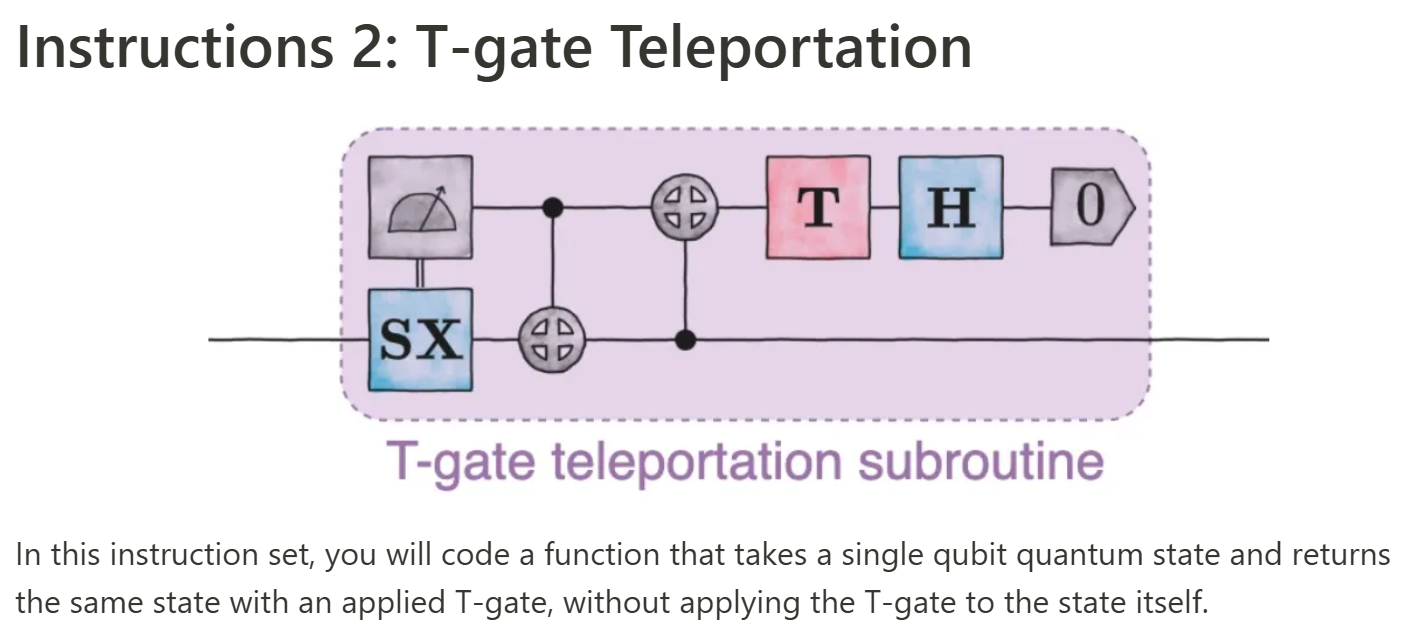

In this instruction set, you will code a function that takes a single qubit quantum state and returns the same state with an applied T-gate, without applying the T-gate to the state itself.

1. Write a function that takes a single qubit quantum state and returns the $2$-qubit entangled quantum state $|\varphi_2\rangle$ (see lecture notes) from the diagram, so the state right after the second CNOT gate.

In [95]:
CNOT_10 = np.kron(H, H) @ CNOT_01 @ np.kron(H, H)
pd.DataFrame(np.round(CNOT_10, 1))

0    1    2    3
0  1.0 -0.0 -0.0  0.0
1  0.0 -0.0 -0.0  1.0
2 -0.0  0.0  1.0 -0.0
3 -0.0  1.0  0.0 -0.0

In [96]:

def init_state(psi):
  g1 = create_q_gate_on_2_qubits(H, I)
  g2 = create_q_gate_on_2_qubits(T, I)
  g3 = CNOT_10
  g4 = CNOT_01
  return g4 @ g3 @ g2 @ g1 @ create_2_qubits_state(state_0, psi)

2. Combine that with the functions from above (Instruction 1: 1.-3.) to implement the whole T-gate teleportation subroutine. This function should intake a state $|\psi\rangle$ and return $\mathbf T|\psi\rangle$ without applying the T-gate directly to this state.

In [97]:
# needs psi as an input.
psi = state_0
phi = init_state(psi) 
p_0 = compute_2q_marginal_prob_for_o0(phi)
o_0 = single_shot_from_p0(p_0)
phi_collapsed = collaps_2q_state(phi, o_0, p_0)
Tpsi = np.linalg.matrix_power(X @ S, o_0) @ phi_collapsed

In [98]:
Tpsi

array([[-7.07106781e-01+7.07106781e-01j],
       [-3.61018765e-33+8.71576399e-33j]])

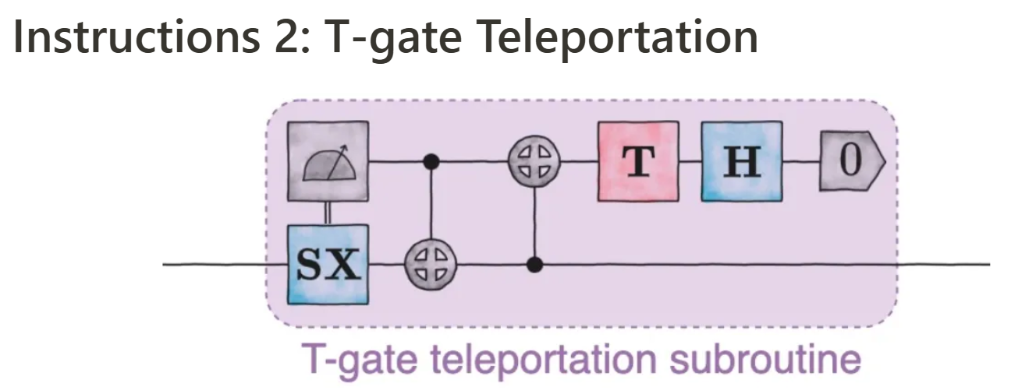

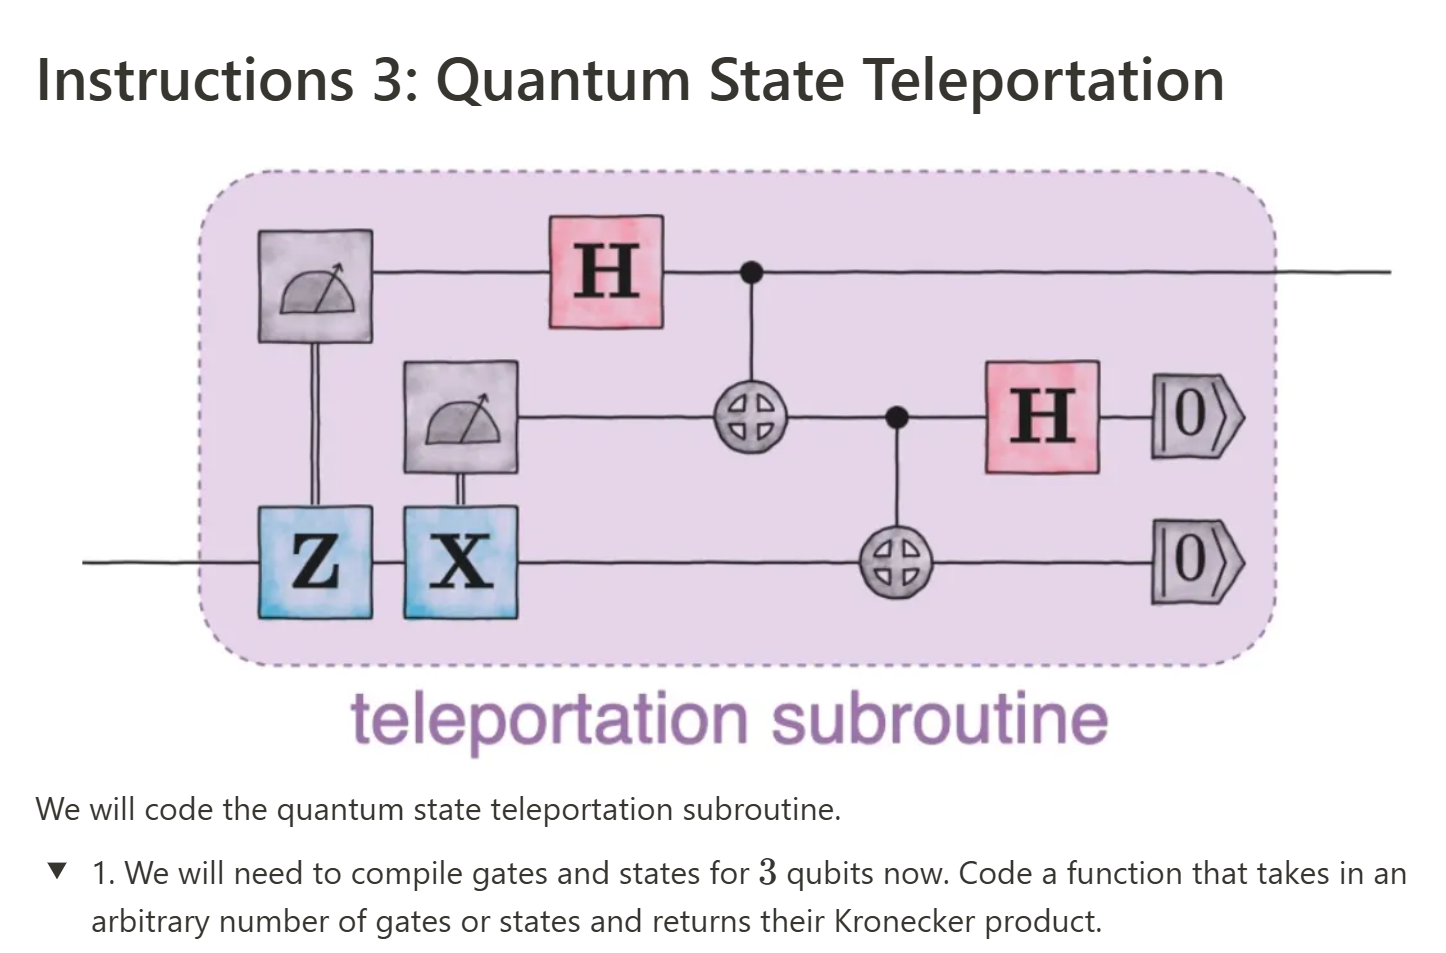

1. We will need to compile gates and states for $3$ qubits now. Code a function that takes in an arbitrary number of gates or states and returns their Kronecker product.

In [99]:
def multikron(*args): 
    result = 1 + 0j
    for array in args:
        result = np.kron(result, array)
    return result

2. Code the function that takes in the quantum state which will be teleported (we will call it psi) and returns the $3$-qubit quantum state right before the first measurement in the teleportation subroutine.

In [100]:
def init_state(psi):
    layers = [ # Create list of gates of the teleportation algorithm.
        [I, H, I], 
        [I, CNOT_01], 
        [CNOT_01, I],
        [H, I, I]
    ]

    middle_gates = np.eye(2 ** 3, dtype=np.complex128)
    for layer in layers[::-1]:
        middle_gates @= multikron(*layer)
    return middle_gates @ multikron(psi, state_0, state_0)

In [101]:
psi, multikron(psi, state_0, state_0)

(array([[1],
        [0]]),
 array([[1.+0.j],
        [0.+0.j],
        [0.+0.j],
        [0.+0.j],
        [0.+0.j],
        [0.+0.j],
        [0.+0.j],
        [0.+0.j]]))

3. Code a function similar to the function from Instruction 1.1, just for a $3$-qubit state instead of a $2$-qubit state, where the input should also be which qubit is being measured.
More precisely, code a function that takes in a $3$-qubit quantum state in vector form and the qubit system which is being measured and output the probability that this system will give the $0$ outcome.

In [102]:
def compute_marginal_prob0(state, which_q):
    num_qubits = int(np.log2(len(state)))
    # Create an array of binary strings matching the state labeling convention.
    numbers_bin = [format(n, f'0{num_qubits}b') for n in range(len(state))]
    # Create a mask to filter the desired outcome 0.
    mask_array = np.array([bin_str[which_q] == '0' for bin_str in numbers_bin])
    # Turn the probability amplitudes into probabilities
    outcome_probs = np.abs(state) ** 2
    # Sum over all probabilities where the labeling as a 0 on the qubit in question.
    return np.sum(outcome_probs[mask_array]) 


4. Code a function similar to the function from Instruction 1.3, just for a $3$-qubit state instead of a $2$-qubit state, where an input should also be which qubit is being measured.
More precisely, code a function that takes in a $3$-qubit quantum state in vector form, the outcome $o$ and the probability $p_0$ and which system is being collapsed.

In [103]:
def collaps_state(phi, o_0, p_0, which_q):
  num_qubits = int(np.log2(len(phi)))
  basis_state = to_dual(state_0) if o_0 == 0 else to_dual(state_1)
  list_to_collaps = [basis_state if k == which_q else I for k in range(num_qubits)]
  matrix_to_collaps = multikron(*list_to_collaps)
  return matrix_to_collaps @ phi / np.sqrt(p_0)


5. Code the whole protocol.

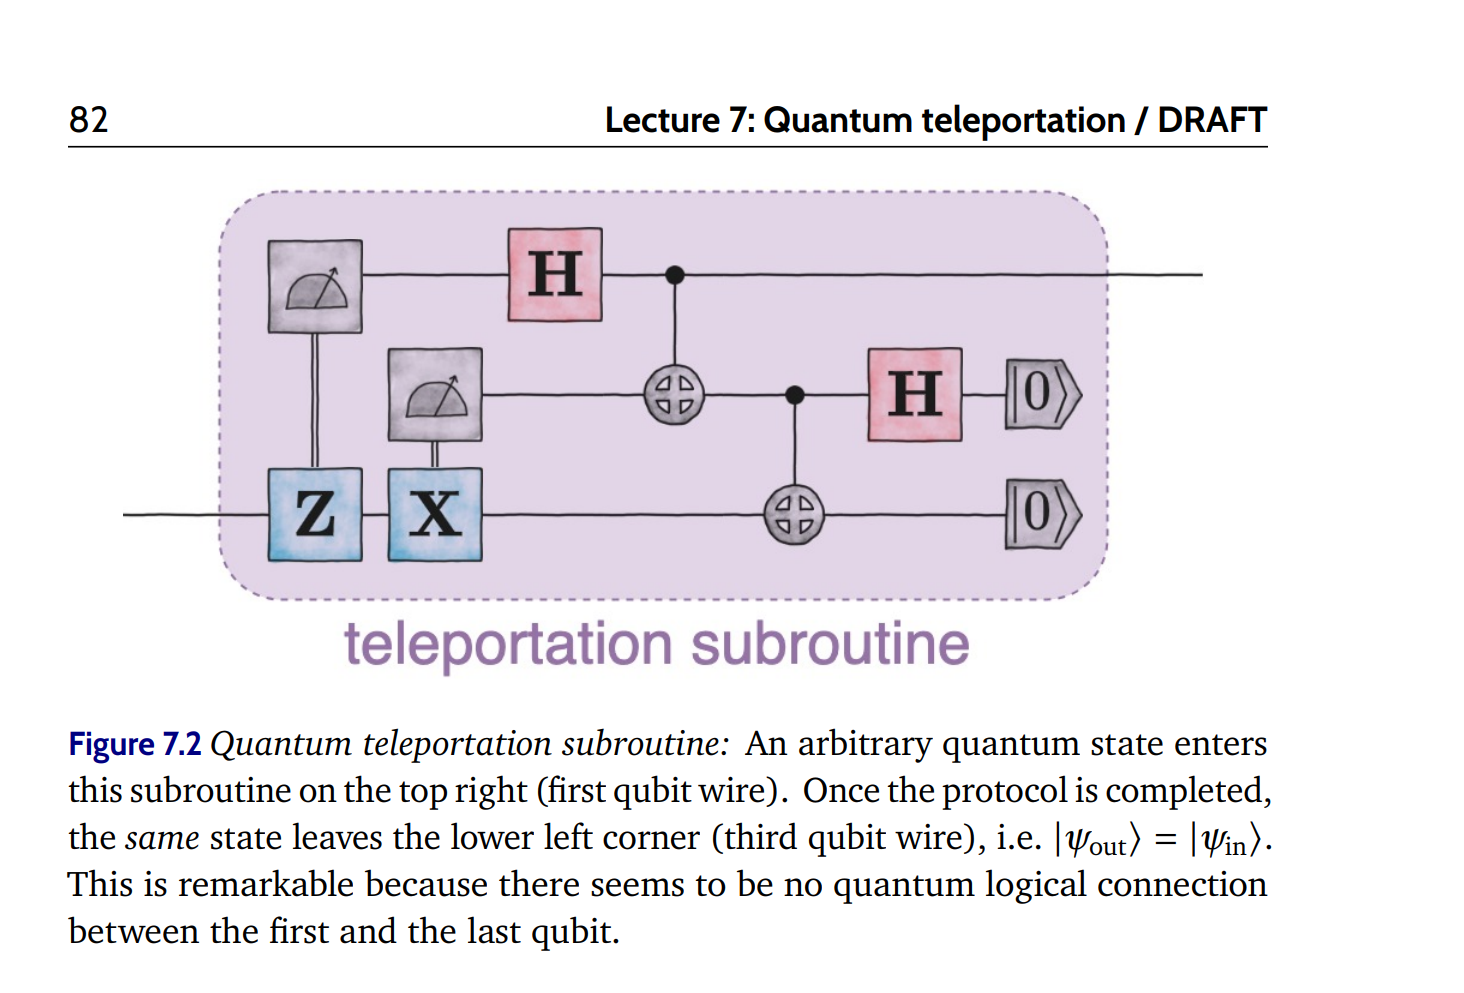

In [104]:
def compute_marginal_prob0(state, which_q):
    num_qubits = int(np.log2(len(state)))
    # Create an array of binary strings matching the state labeling convention.
    numbers_bin = [format(n, f'0{num_qubits}b') for n in range(len(state))]
    # Create a mask to filter the desired outcome 0.
    mask_array = np.array([bin_str[which_q] == '0' for bin_str in numbers_bin])
    # Turn the probability amplitudes into probabilities
    outcome_probs = np.abs(state) ** 2
    # Sum over all probabilities where the labeling as a 0 on the qubit in question.
    return np.sum(outcome_probs[mask_array]) 

def collaps_state(phi, o_0, p_0, which_q):
    num_qubits = int(np.log2(len(phi)))
    basis_state = to_dual(state_0) if o_0 == 0 else to_dual(state_1)
    list_to_collaps = [basis_state if k == which_q else I for k in range(num_qubits)]
    matrix_to_collaps = multikron(*list_to_collaps)
    return matrix_to_collaps @ phi / np.sqrt(p_0)



# needs psi as an input.
phi = init_state(psi) # 
print("psi:\n", psi)
print("T-Gate teleportation subroutine:\n", phi)
# Do the first partial measurement
p0_1 = compute_marginal_prob0(phi, 1)
print("Extracting marginal probs p0_1:\n", p0_1)
o1 = single_shot_from_p0(p0_1)
print("Monte Carlo (random) estimation\n", o1)
phi_1 = collaps_state(phi, o1, p0_1, 1)
print("collaps_state phi_1:\n", phi_1)
# Do the second partial measurement.
p0_0 = compute_marginal_prob0(phi, 0)
print("Extracting marginal probs p0_0:\n", p0_0)
o0 = single_shot_from_p0(p0_0)
print("Monte Carlo (random) estimation\n", o0)
phi_2 = collaps_state(phi_1, o0, p0_0, 0)
print("collaps_state phi_2:\n", phi_2)
# Apply the gates depending on the outcomes of Alice.
Bobs_gate = np.linalg.matrix_power(Z, o0) @ np.linalg.matrix_power(X, o1)
print("Bobs gate:\n", Bobs_gate)
teleported_psi = Bobs_gate @ phi_2

psi:
 [[1]
 [0]]
T-Gate teleportation subroutine:
 [[0.5+0.j]
 [0. +0.j]
 [0. +0.j]
 [0.5+0.j]
 [0.5+0.j]
 [0. +0.j]
 [0. +0.j]
 [0.5+0.j]]
Extracting marginal probs p0_1:
 0.4999999999999998
Monte Carlo (random) estimation
 0
collaps_state phi_1:
 [[0.70710678+0.j]
 [0.        +0.j]
 [0.70710678+0.j]
 [0.        +0.j]]
Extracting marginal probs p0_0:
 0.4999999999999998
Monte Carlo (random) estimation
 0
collaps_state phi_2:
 [[1.+0.j]
 [0.+0.j]]
Bobs gate:
 [[1 0]
 [0 1]]


In [105]:
psi, teleported_psi

(array([[1],
        [0]]),
 array([[1.+0.j],
        [0.+0.j]]))

In [106]:
phi = init_state(psi) # 
print("psi:\n", psi)
print("T-Gate teleportation subroutine:\n", phi)
# Do the first partial measurement
p0_1 = compute_marginal_prob0(phi, 0)
print(p0_1)

psi:
 [[1]
 [0]]
T-Gate teleportation subroutine:
 [[0.5+0.j]
 [0. +0.j]
 [0. +0.j]
 [0.5+0.j]
 [0.5+0.j]
 [0. +0.j]
 [0. +0.j]
 [0.5+0.j]]
0.4999999999999998


What is the probability that the second person draws the short straw, given that the first one did not?  n=10

In [107]:
1/9

0.1111111111111111

In [108]:
U_ = Z @ X
(np.abs(np.kron(np.kron(I, I), U_) @ np.kron(np.kron(H, I), I) @ np.kron(CNOT_01, I) @ np.kron(psi, bell_state_00)))**2

array([[0.  ],
       [0.25],
       [0.25],
       [0.  ],
       [0.  ],
       [0.25],
       [0.25],
       [0.  ]])

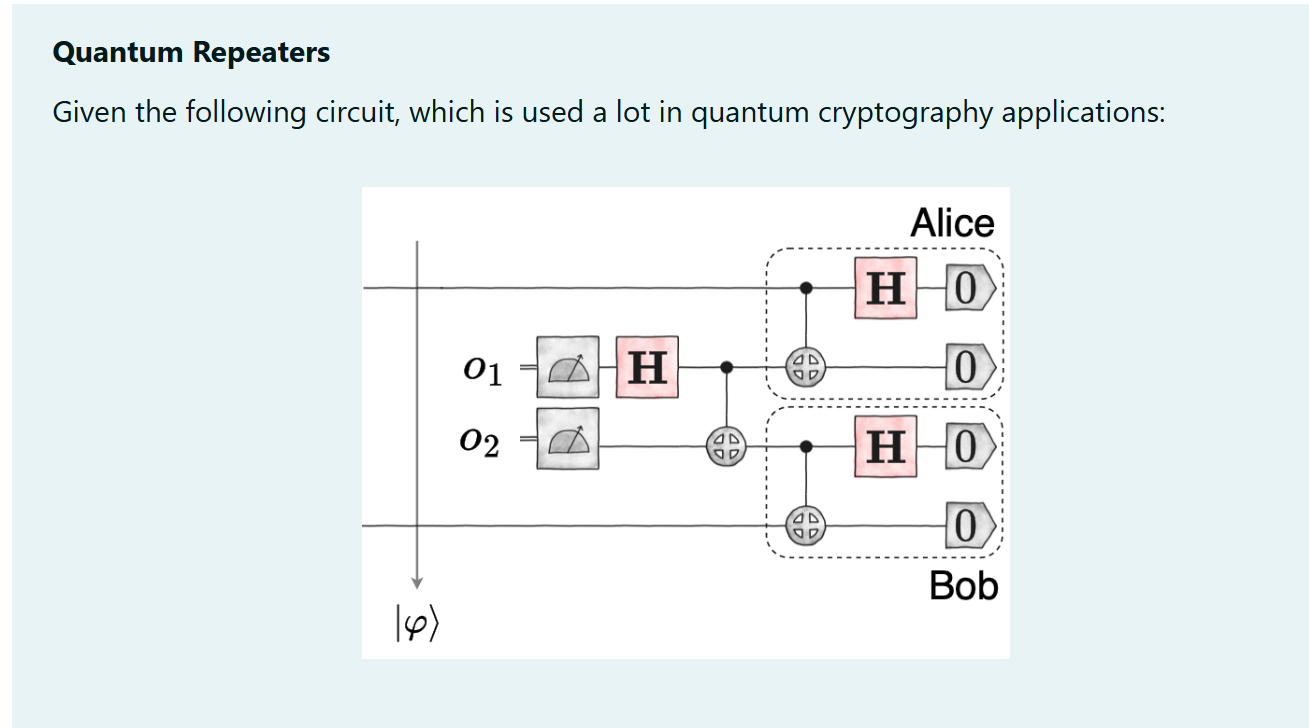

In [109]:
res = np.kron(np.kron(np.kron(I, H), I), I) @ np.kron(np.kron(I, CNOT_01), I) @ np.kron(bell_state_10, bell_state_01)

In [110]:
compute_marginal_prob0(res, 0)

0.4999999999999998

In [111]:
compute_marginal_prob0(res, 1)

0.4999999999999998

In [112]:
num_qubits = int(np.log2(len(res)))
# Create an array of binary strings matching the state labeling convention.
numbers_bin = [format(n, f'0{num_qubits}b') for n in range(len(res))]
# Create a mask to filter the desired outcome 0.
which_q_ = 1
mask_array = np.array([bin_str[which_q_] == '0' for bin_str in numbers_bin])
num_qubits, numbers_bin, mask_array

(4,
 ['0000',
  '0001',
  '0010',
  '0011',
  '0100',
  '0101',
  '0110',
  '0111',
  '1000',
  '1001',
  '1010',
  '1011',
  '1100',
  '1101',
  '1110',
  '1111'],
 array([ True,  True,  True,  True, False, False, False, False,  True,
         True,  True,  True, False, False, False, False]))

In [113]:
# Turn the probability amplitudes into probabilities
outcome_probs = np.abs(res) ** 2
# Sum over all probabilities where the labeling as a 0 on the qubit in question.
outcome_probs, np.sum(outcome_probs[mask_array]) 

(array([[0.   ],
        [0.125],
        [0.125],
        [0.   ],
        [0.   ],
        [0.125],
        [0.125],
        [0.   ],
        [0.125],
        [0.   ],
        [0.   ],
        [0.125],
        [0.125],
        [0.   ],
        [0.   ],
        [0.125]]),
 0.4999999999999998)

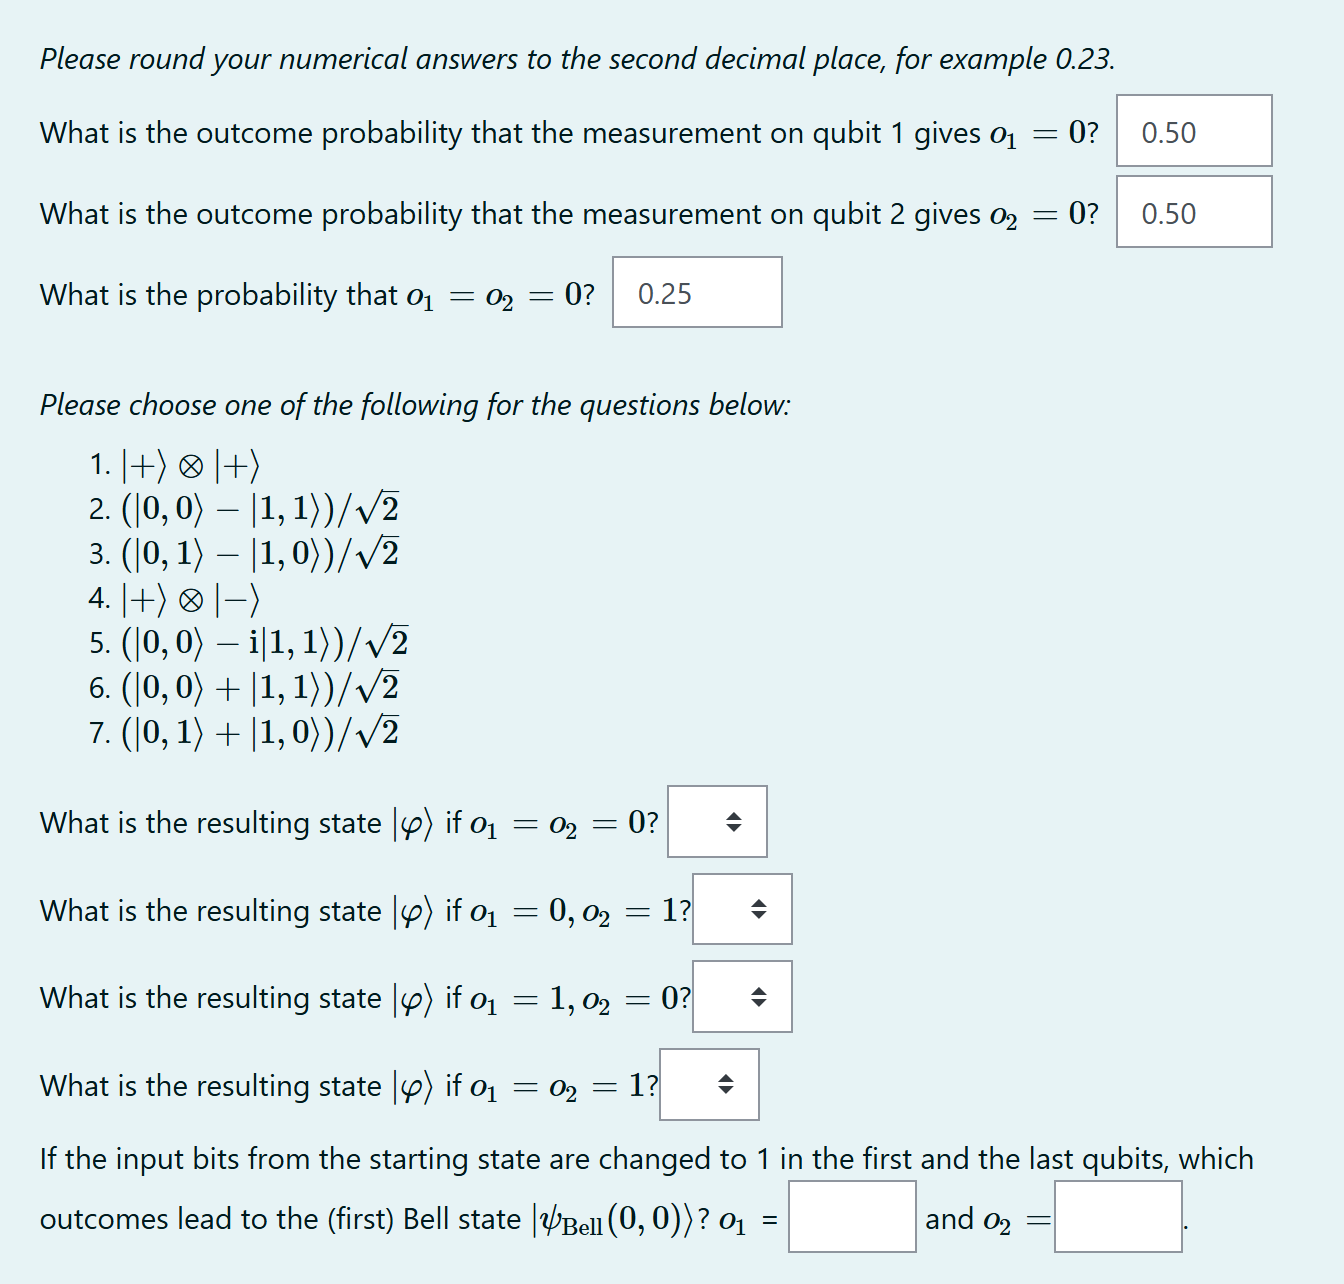

In [114]:
compute_marginal_prob0(np.kron(state_plus, state_plus), 0)

0.4999999999999998

In [115]:
np.abs(np.kron(state_plus, state_plus)) ** 2

array([[0.25],
       [0.25],
       [0.25],
       [0.25]])

In [116]:
state_00 = np.kron(state_0, state_0)
state_01 = np.kron(state_0, state_1)
state_10 = np.kron(state_1, state_0)
state_11 = np.kron(state_1, state_1)

opt1 = readout(np.kron(state_plus, state_plus))
opt2 = readout((state_00 - state_01) / np.sqrt(2))
opt3 = readout((state_01 - state_10) / np.sqrt(2))
opt4 = readout(np.kron(state_plus, state_minus))
opt6 = readout((state_00 + state_11) / np.sqrt(2))
opt7 = readout((state_01 + state_10) / np.sqrt(2))

opt1, opt2, opt3, opt4, opt6, opt7

([array([0.25]), array([0.25]), array([0.25]), array([0.25])],
 [array([0.5]), array([0.5]), array([0.]), array([0.])],
 [array([0.]), array([0.5]), array([0.5]), array([0.])],
 [array([0.25]), array([0.25]), array([0.25]), array([0.25])],
 [array([0.5]), array([0.]), array([0.]), array([0.5])],
 [array([0.]), array([0.5]), array([0.5]), array([0.])])

In [117]:
phi = np.kron(np.kron(np.kron(I, H), I), I) @ np.kron(np.kron(I, CNOT_01), I) @ np.kron(bell_state_01, bell_state_10)

In [118]:
which_q1 = 1
which_q2 = 0
p0_1 = compute_marginal_prob0(phi, which_q1)
o1 = single_shot_from_p0(p0_1)
phi_1 = collaps_state(phi, o1, p0_1, which_q2)
phi_1

array([[ 0. +0.j],
       [-0.5+0.j],
       [ 0.5+0.j],
       [ 0. +0.j],
       [ 0. +0.j],
       [ 0.5+0.j],
       [-0.5+0.j],
       [ 0. +0.j]])

In [119]:
# needs psi as an input.
phi = init_state(psi)
# Do the first partial measurement
which_q1 = 1
which_q2 = 0
p0_1 = compute_marginal_prob0(phi, which_q1)
o1 = single_shot_from_p0(p0_1)
phi_1 = collaps_state(phi, o1, p0_1, which_q2)
phi_1, opt6

(array([[0.70710678+0.j],
        [0.        +0.j],
        [0.        +0.j],
        [0.70710678+0.j]]),
 [array([0.5]), array([0.]), array([0.]), array([0.5])])

In [120]:
opt1 = (np.kron(state_plus, state_plus))
opt2 = ((state_00 - state_01) / np.sqrt(2))
opt3 = ((state_01 - state_10) / np.sqrt(2))
opt4 = (np.kron(state_plus, state_minus))
opt5 = ((state_00 - 1j * state_01) / np.sqrt(2))
opt6 = ((state_00 + state_11) / np.sqrt(2))
opt7 = ((state_01 + state_10) / np.sqrt(2))
# compute_marginal_prob0(opt6, 0), compute_marginal_prob0(opt6, 1)

In [121]:
opt1, opt2, opt3, opt4, opt5, opt6, opt7

(array([[0.5],
        [0.5],
        [0.5],
        [0.5]]),
 array([[ 0.70710678],
        [-0.70710678],
        [ 0.        ],
        [ 0.        ]]),
 array([[ 0.        ],
        [ 0.70710678],
        [-0.70710678],
        [ 0.        ]]),
 array([[ 0.5],
        [-0.5],
        [ 0.5],
        [-0.5]]),
 array([[0.70710678+0.j        ],
        [0.        -0.70710678j],
        [0.        +0.j        ],
        [0.        +0.j        ]]),
 array([[0.70710678],
        [0.        ],
        [0.        ],
        [0.70710678]]),
 array([[0.        ],
        [0.70710678],
        [0.70710678],
        [0.        ]]))

## Worksheet 6: General n-qubits architecture'
***


1.  Write a function that ‘distributes’ single qubit gate(s) into a larger quantum gate. Meaning a gate like $\mathbf X\otimes \mathbf H$ can easily be expanded to something like $\mathbb I\otimes \mathbf X\otimes\mathbb I\otimes\mathbf H$, where the X gate then acts on the second and not the first qubit, and the Hadamard acts on the last qubit, not the second.

In [122]:
def pad_1q_gates_Is(nqubits, list_single_q_gates, act_on_qubits) -> list:
    identities_padded = np.array([I] * nqubits, dtype=np.complex128)
    identities_padded[act_on_qubits] = np.array(list_single_q_gates)
    return identities_padded

In [123]:
pad_1q_gates_Is(5, [H, X], [1, 3]), np.array([I] * 5, dtype=np.complex128).shape

(array([[[ 1.        +0.j,  0.        +0.j],
         [ 0.        +0.j,  1.        +0.j]],
 
        [[ 0.70710678+0.j,  0.70710678+0.j],
         [ 0.70710678+0.j, -0.70710678+0.j]],
 
        [[ 1.        +0.j,  0.        +0.j],
         [ 0.        +0.j,  1.        +0.j]],
 
        [[ 0.        +0.j,  1.        +0.j],
         [ 1.        +0.j,  0.        +0.j]],
 
        [[ 1.        +0.j,  0.        +0.j],
         [ 0.        +0.j,  1.        +0.j]]]),
 (5, 2, 2))

2.  (re)write a general function which calculates the probability of measuring any of the $2^n$ possible outcomes given a quantum state, $|\psi \rangle$. 

In [124]:
def calculate_measurement_probabilitites(psi):
  return np.abs(psi) ** 2

3.  (re)write a general function returning a single quantum gate/quantum gate given a list of gates/states that are applied in parallel/initialised in parallel. 

In [125]:
def multikron(*args):
    result = 1 + 0j
    for array in args:
        result = np.kron(result, array)
    return result

4.  (re)write a general function which calculates the marginal probability to measure $0$ of a specific qubit in a larger $n$ qubit state.

In [126]:
def collaps_state(phi, o_0, p_0, which_q):
  num_qubits = int(np.log2(len(phi)))
  basis_state = to_dual(state_0) if o_0 == 0 else to_dual(state_1)
  list_to_collaps = [basis_state if k == which_q else I for k in range(num_qubits)]
  matrix_to_collaps = multikron(*list_to_collaps)
  return matrix_to_collaps @ phi / np.sqrt(p_0)

In [127]:
basis_state = to_dual(state_0)
pd.DataFrame(multikron(*[basis_state if k == 0 else I for k in range(num_qubits)]))

0         1         2         3         4         5         6   \
0  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
1  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
3  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
4  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j   
5  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j   
6  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j   
7  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   

         7         8         9         10        11        12        13  \
0  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
1  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
3  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
4  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
5  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
6  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
7  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   

         14        15  
0  0.0+0.0j  0.0+0.0j  
1  0.0+0.0j  0.0+0.0j  
2  0.0+0.0j  0.0+0.0j  
3  0.0+0.0j  0.0+0.0j  
4  0.0+0.0j  0.0+0.0j  
5  0.0+0.0j  0.0+0.0j  
6  0.0+0.0j  0.0+0.0j  
7  0.0+0.0j  0.0+0.0j

### Entangling gates between qubits which are not neighbours

1. Define a function which takes two-qubit labels $q_0$ (the control qubit) and $q_1$ (the target qubit) and the number of qubits $n$, and returns the CNOT matrix gate ${\mathrm{CNOT}_{q_0\rightarrow q_1}}$ with size $(2^n, 2^n)$.

In [128]:
M_00 = np.array([[1, 0], [0, 0]])
M_11 = np.array([[0, 0], [0, 1]])
LIST_LAYERS_CNOT = [[M_00, I], [M_11, X]]

def Cnot(nqubits, qubits_list):
    padded_layers = [pad_1q_gates_Is(nqubits, gate_list, qubits_list) for gate_list in LIST_LAYERS_CNOT]
    return np.sum([multikron(*l) for l in padded_layers], axis=0)

In [129]:
Cnot(2, [1, 0]), CNOT_01, np.round(CNOT_10, 2)

(array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]]),
 array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0]]),
 array([[ 1., -0., -0.,  0.],
        [ 0., -0., -0.,  1.],
        [-0.,  0.,  1., -0.],
        [-0.,  1.,  0., -0.]]))

2. Define a global variable: TOFFOLI (two folded CNOT gates) with qubit 0 and qubit 1 as the control and qubit 2 as the target (like in the lecture).

In [130]:
TOFFOLI = np.array([
  [1, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 1, 0]
])


This is the truth table of a two-fold controlled bitflip: the third truth value is
flipped if the first two bits are equal to 1. Otherwise, nothing happens.

In [131]:
TOFFOLI @ multikron(*[state_1, state_1, state_1]), multikron(*[state_1, state_1, state_1])

(array([[0.+0.j],
        [0.+0.j],
        [0.+0.j],
        [0.+0.j],
        [0.+0.j],
        [0.+0.j],
        [1.+0.j],
        [0.+0.j]]),
 array([[0.+0.j],
        [0.+0.j],
        [0.+0.j],
        [0.+0.j],
        [0.+0.j],
        [0.+0.j],
        [0.+0.j],
        [1.+0.j]]))

c

In [132]:
def pad_1q_gates_Is(nqubits, list_single_q_gates, act_on_qubits) -> list:
    identities_padded = np.array([I] * nqubits, dtype=np.complex128)
    identities_padded[act_on_qubits] = np.array(list_single_q_gates)
    return identities_padded

M_00 = np.array([[1, 0], [0, 0]])
M_11 = np.array([[0, 0], [0, 1]])
LIST_LAYERS_TOFFOLI_v2 = [[M_00, M_00, I], [M_00, M_11, I], [M_11, M_00, I], [M_11, M_11, X]]

def Toffoli_v2(nqubits, qubits_list):
    padded_layers = [pad_1q_gates_Is(nqubits, gate_list, qubits_list) for gate_list in LIST_LAYERS_TOFFOLI_v2]
    return np.sum([multikron(*l) for l in padded_layers], axis=0)


In [133]:
pd.DataFrame(Toffoli_v2(3, [0, 1 , 2]))

0         1         2         3         4         5         6  \
0  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
1  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
3  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
4  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j   
5  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j   
6  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
7  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j   

          7  
0  0.0+0.0j  
1  0.0+0.0j  
2  0.0+0.0j  
3  0.0+0.0j  
4  0.0+0.0j  
5  0.0+0.0j  
6  1.0+0.0j  
7  0.0+0.0j

### Boolean logic in quantum circuit
***
Implement a quantum circuit for logical AND operation. Make it take the qubit labels and the number of qubits again, like in Instructions 2.1 and 2.3, to make the application flexible in a bigger circuit.

In [134]:
def AND(nqubits, qubit0, qubit1, qubit_store):
    return Toffoli_v2(nqubits, [qubit0, qubit1, qubit_store])

Implement a quantum circuit for logical OR operation. Make it take the qubit labels and the number of qubits again, like in Instructions 2.1 and 2.3, to make the application flexible in a bigger circuit.

In [135]:
def OR(nqubits, qubit0, qubit1, qubit_store):
    Xs_list_before = pad_1q_gates_Is(nqubits, [X, X, X], [qubit0, qubit1, qubit_store])
    Xs_dense_before = multikron(*Xs_list_before)
    dense_Toffoli = Toffoli_v2(nqubits, [qubit0, qubit1, qubit_store])
    Xs_list_after = pad_1q_gates_Is(nqubits, [X, X], [qubit0, qubit1])
    Xs_dense_after = multikron(*Xs_list_after)
    return Xs_dense_after @ dense_Toffoli @ Xs_dense_before

In [136]:
Xs_list_before = pad_1q_gates_Is(3, [X, X, X], [0,1,2])
Xs_dense_before = multikron(*Xs_list_before)
dense_Toffoli = Toffoli_v2(3, [0, 1, 2])
Xs_list_after = pad_1q_gates_Is(3, [X, X], [0, 1])
Xs_list_before.shape, Xs_dense_before.shape, dense_Toffoli.shape, Xs_list_after.shape

((3, 2, 2), (8, 8), (8, 8), (3, 2, 2))

In [137]:
OR(2, 0, 1, 0)

array([[1.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j]])

Computing Resources

As your classical simulator of quantum circuits should now support n
 qubit circuits, maybe it's a good time to discuss what n
 is feasible on your desktop machines.
 
Given a gate which acts on 3 qubits, how many complex numbers are required to store this gate in memory? 

In [138]:
pd.DataFrame(Toffoli_v2(3, [0, 1, 2]))

0         1         2         3         4         5         6  \
0  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
1  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
3  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
4  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j   
5  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j   
6  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
7  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j   

          7  
0  0.0+0.0j  
1  0.0+0.0j  
2  0.0+0.0j  
3  0.0+0.0j  
4  0.0+0.0j  
5  0.0+0.0j  
6  1.0+0.0j  
7  0.0+0.0j

How many KiloBytes is this?

Assume your code is in python but uses numpy and each complex number consists of 2 doubles, so it takes 128 bits in total.
Assume computer science conversion where 1 kilobyte (kb) = 1024 bytes.
You might find the following website useful: https://www.matisse.net/bitcalc/?input_amount=0&input_units=bytes¬ation=legacy

In [139]:
n = 42 #gigabits
(4**n) * 128 / 1024 / 1024 / 1024

2.305843009213694e+18

In [140]:
Xs_list_after = pad_1q_gates_Is(3, [X, X], [0, 1])
Xs_dense_after = multikron(*Xs_list_after)

Xs_list_after.shape, Xs_dense_after.shape

((3, 2, 2), (8, 8))

In [141]:
Xs_dense_after.shape, dense_Toffoli.shape, Xs_dense_before.shape

((8, 8), (8, 8), (8, 8))

In [142]:
pd.DataFrame(OR(3, 0, 1, 2)).shape

(8, 8)

In [143]:
TOFFOLI.shape

(8, 8)

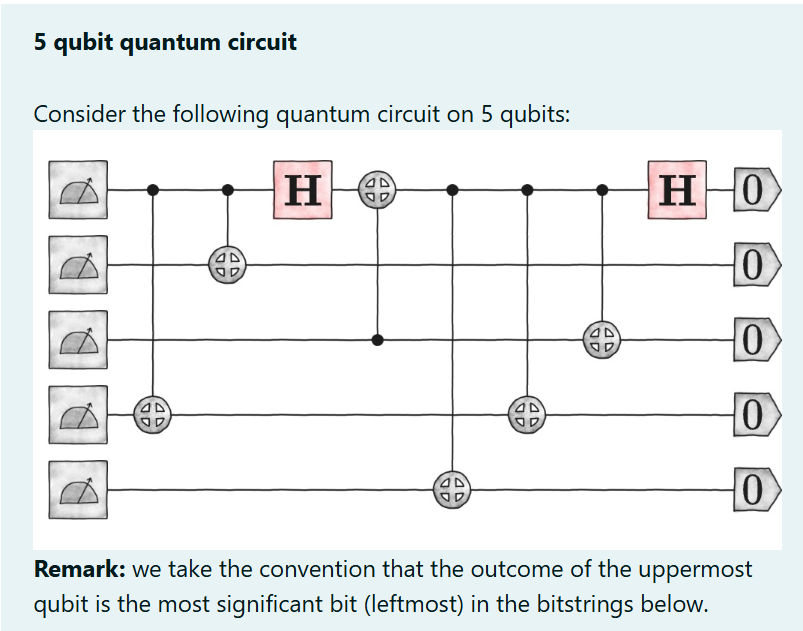

In [144]:
pd.DataFrame(Toffoli_v2(3, [0, 1 , 2]))

0         1         2         3         4         5         6  \
0  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
1  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
3  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
4  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.0+0.0j   
5  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j  0.0+0.0j   
6  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
7  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+0.0j   

          7  
0  0.0+0.0j  
1  0.0+0.0j  
2  0.0+0.0j  
3  0.0+0.0j  
4  0.0+0.0j  
5  0.0+0.0j  
6  1.0+0.0j  
7  0.0+0.0j

In [145]:
(np.kron(Toffoli_v2(3, [0, 1 , 2]), I) == Toffoli_v2(4, [0, 1, 2])).all()

True

In [146]:
(np.kron(Toffoli_v2(4, [0, 1 , 2]), I) == Toffoli_v2(5, [0, 1, 2])).all()

True

In [147]:
Toffoli_v2(5, [0, 1, 2]).shape, 2**5

((32, 32), 32)

In [148]:
Toffoli_v2(4, [0, 1, 2]).shape

(16, 16)

In [149]:
(Cnot(5, [0, 2]) == Toffoli_v2(5, [0, 1, 2]))

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [150]:
cnot_q4 = [Cnot(5, [0, 2])]
cnot_q5 = [Toffoli_v2(5, [0, 1, 2])]
I_q4 = [np.eye(2**4, dtype=np.complex128)]

layers= [
        [H, I_q4], 
        [Cnot(5, [0, 2])],
        [Cnot(5, [0, 3])],
        [Cnot(5, [0, 4])],
        [Cnot(5, [2, 0])],
        [H, I_q4],
        [Cnot(5, [0, 1])],
        [Cnot(5, [0, 3])]
        ]

middle_gates = np.eye(2 ** 5, dtype=np.complex128)
for layer in layers[::-1]:
    middle_gates @= multikron(*layer)
result =  middle_gates @ multikron(state_0, state_0, state_0, state_0, state_0)
result.shape


(32, 1)

In [151]:
targets = ["00000", "00001", "00111", "10000", "11000", "11010", "11101", "11111"]
lst_strings = [format(n, f'0{5}b') for n in range(32)]
ps = calculate_measurement_probabilitites(result)

for target in targets:
    idx = lst_strings.index(target)
    print(ps[idx])

[0.25]
[0.]
[0.25]
[0.]
[0.]
[0.25]
[0.25]
[0.]


In [152]:
targets2 = [elem for elem in lst_strings if elem.startswith("00") or elem.startswith("11")]

In [153]:
[elem for elem in lst_strings if elem.startswith("0") and elem.endswith("0")]

['00000', '00010', '00100', '00110', '01000', '01010', '01100', '01110']

In [154]:
targets3 = [elem for elem in lst_strings if elem.startswith("1") and elem.endswith("1")]
targets4 = [elem for elem in lst_strings if elem.startswith("0") and elem.endswith("0")]

In [155]:
lst_strings = [format(n, f'0{5}b') for n in range(32)]
ps = calculate_measurement_probabilitites(result)

for target in targets2:
    idx = lst_strings.index(target)
    print(target, ps[idx])

00000 [0.25]
00001 [0.]
00010 [0.]
00011 [0.]
00100 [0.]
00101 [0.]
00110 [0.]
00111 [0.25]
11000 [0.]
11001 [0.]
11010 [0.25]
11011 [0.]
11100 [0.]
11101 [0.25]
11110 [0.]
11111 [0.]


In [156]:
lst_strings = [format(n, f'0{5}b') for n in range(32)]
ps = calculate_measurement_probabilitites(result)

for target in targets3 + targets4:
    idx = lst_strings.index(target)
    print(target, ps[idx])

10001 [0.]
10011 [0.]
10101 [0.]
10111 [0.]
11001 [0.]
11011 [0.]
11101 [0.25]
11111 [0.]
00000 [0.25]
00010 [0.]
00100 [0.]
00110 [0.]
01000 [0.]
01010 [0.]
01100 [0.]
01110 [0.]


In [157]:
lst_strings = [format(n, f'0{5}b') for n in range(32)]
ps = calculate_measurement_probabilitites(result)

for target in lst_strings:
    idx = lst_strings.index(target)
    print(target, ps[idx])

00000 [0.25]
00001 [0.]
00010 [0.]
00011 [0.]
00100 [0.]
00101 [0.]
00110 [0.]
00111 [0.25]
01000 [0.]
01001 [0.]
01010 [0.]
01011 [0.]
01100 [0.]
01101 [0.]
01110 [0.]
01111 [0.]
10000 [0.]
10001 [0.]
10010 [0.]
10011 [0.]
10100 [0.]
10101 [0.]
10110 [0.]
10111 [0.]
11000 [0.]
11001 [0.]
11010 [0.25]
11011 [0.]
11100 [0.]
11101 [0.25]
11110 [0.]
11111 [0.]


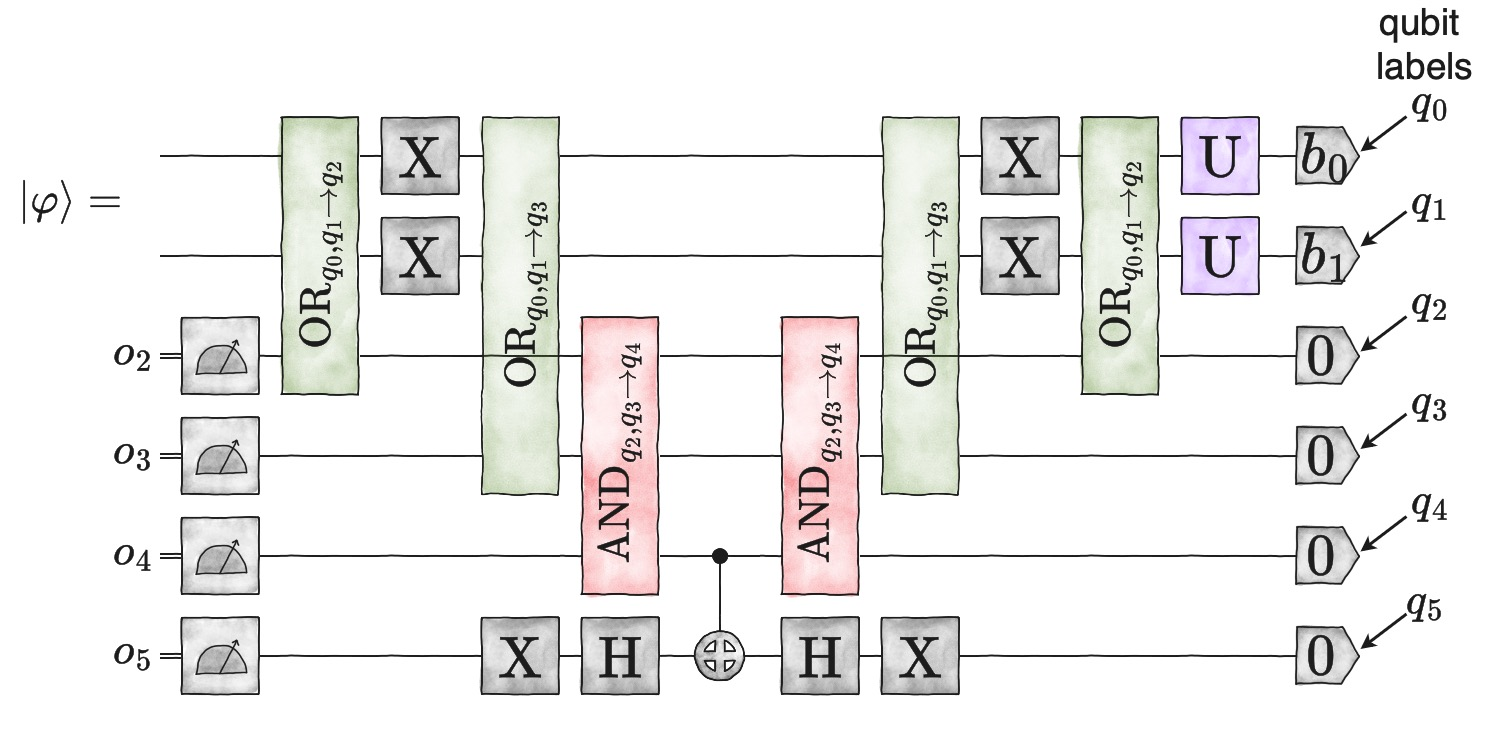

In [169]:
AND(3, 0, 1, 2).shape

(8, 8)

In [205]:
bit_0 = state_0
bit_1 = state_0

U = H

layers = [
    [U, U, I, I, I, I],
    [OR(3, 0, 1, 2), I, I, I],
    [X, X, I, I, I, I],
    [OR(4, 0, 1, 3), I, X],
    [I, I, AND(3, 0, 1, 2), H],
    [I, I, I, I, Cnot(2, [0, 1])],
    [I, I, AND(3, 0, 1, 2), H],
    [OR(4, 0, 1, 3), I, X],
    [X, X, I, I, I, I],
    [OR(3, 0, 1, 2), I, I, I],
]

middle_gates = np.eye(2 ** 6, dtype=np.complex128)
for layer in layers[::-1]:
    middle_gates @= multikron(*layer)
state =  middle_gates @ multikron(bit_0, bit_0, state_0, state_0, state_0, state_0)
# middle_gates.shape

In [206]:
num_qubits = int(np.log2(len(state)))
num_qubits

6

In [207]:
while num_qubits > 2:
    print("num__qubits", num_qubits)
    p_0 = compute_marginal_prob0(result, num_qubits-1)
    print("p_0", p_0)
    o_0 = single_shot_from_p0(p_0)
    state = collaps_state(state, o_0, p_0, num_qubits-1)
    print("state.shape", state.shape)
    num_qubits = int(np.log2(len(state)))
state

num__qubits 6
p_0 0.9999999999999991
state.shape (32, 1)
num__qubits 5
p_0 0.9999999999999991
state.shape (16, 1)
num__qubits 4
p_0 0.9999999999999991
state.shape (8, 1)
num__qubits 3
p_0 0.9999999999999991
state.shape (4, 1)


array([[ 0.5+0.j],
       [-0.5+0.j],
       [-0.5+0.j],
       [ 0.5+0.j]])

## Worksheet #7: Amplitude Amplification
***

1. Code a function that returns the bit string labels of quantum state vectors. This will be useful to plot or look at our results later.

In [208]:
def bitstr_representation(nqubits:int):
    return [format(i, f'0{nqubits}b') for i in range(2 ** nqubits)]

2. Code a function that collapses a state based on a list of outcomes, probabilities, and qubits, so that not only one qubit is ‘collapsed away’, but many.

In [209]:
def collaps_state_multi(state:np.ndarray, outcome_list:list, prob_list:list, qubit_list:list):
    inds = np.argsort(qubit_list)[::-1] # make sure to collapse 'from the back'
    for o, p, q in zip(np.array(outcome_list)[inds], np.array(prob_list)[inds], np.array(qubit_list)[inds]):
        state = collaps_state(state, o, p, q)
    return state

3.  Code a function returning a controlled $\mathbf X$ gate with arbitrarily many control qubits and one target qubit. This is like an extension of the Toffoli gate.

In [211]:
from itertools import product

M_00 = np.array([[1, 0], [0, 0]]) # |0><0|
M_11 = np.array([[0, 0], [0, 1]]) # |1><1|
Ms_array = np.array([M_00, M_11]) # for convenience. 

def controlled_X_nqubits(nqubits:int, control_on_list:list, target_qubit:int):
    qubits_list = control_on_list + [target_qubit]
    combinations = list(product([0,1], repeat = (len(qubits_list) - 1)))[:-1] # all 2 ** nqubit combinations EXEPCT of all 1s.
    list_M_00s_M_11s = [np.append(Ms_array[list(c)], [I], axis=0) for c in combinations]
    list_M_00s_M_11s.append(np.append(Ms_array[[1] * (len(qubits_list) - 1)], [X], axis=0)) 
    padded_layers = [pad_1q_gates_Is(nqubits, gate_list, qubits_list) for gate_list in list_M_00s_M_11s]
    return np.real(np.sum([multikron(*l) for l in padded_layers], axis=0))

4. Code a function that returns the XORs of three (or more general of more) qubits.

In [212]:
def XORs(nqubits:int, control_on_list:list, target_qubit:int):
    final_gate = np.eye(2 ** nqubits)
    for current_q in control_on_list:
        final_gate = Cnot(nqubits, [current_q, target_qubit]) @ final_gate
    return final_gate

1.  Code a function that puts together the diffusion operator, with input n the number of variables (upper qubits) and input sf the number of additional qubits needed for the correct boolean circuit implementation.

In [213]:
def diffusion_operator(n:int, sf:int):
    ntot = n + sf + 1
    qlist_n = [i for i in range(n)]
    right_layer = multikron(*pad_1q_gates_Is(ntot, [X @ H] * n + [H @ X], qlist_n + [ntot - 1]))
    controll_on_n = controlled_X_nqubits(ntot, qlist_n, ntot - 1)
    left_layer = multikron(*pad_1q_gates_Is(ntot, [H @ X] * n + [X @ H], qlist_n + [ntot - 1]))
    return  left_layer @ controll_on_n @ right_layer

2.  Compute the approximate number of optimization steps.

In [214]:
def compute_amplification_steps(ntot_inputs:int, npositive_answers:int):
    rf = npositive_answers / ntot_inputs
    return int(np.round(np.pi / ( 4 * np.sqrt(rf))))

3.  Code a function that computes the oracle circuit, given a list of clauses.

In [218]:
def build_oracle_exact_cover(clauses_list:list):
    n = np.max(clauses_list) + 1 
    qlist_sf = [i + n for i in range(len(clauses_list))] 
    nqubits = n + len(clauses_list) + 1
    final_oracle = np.eye(2 ** nqubits, dtype=np.complex128)
    # The boolean XOR and AND realisation of clauses.
    for count, clause in enumerate(clauses_list):
        final_oracle = XORs(nqubits, clause, count + n ) @ final_oracle
        final_oracle = controlled_X_nqubits(nqubits, clause, count + n ) @ final_oracle # Like big AND
    # Mark the solutions with a -1.
    final_oracle = multikron(*pad_1q_gates_Is(nqubits, [H @ X], [nqubits - 1])) @ final_oracle
    final_oracle = controlled_X_nqubits(nqubits, qlist_sf, nqubits - 1) @ final_oracle
    final_oracle = multikron(*pad_1q_gates_Is(nqubits, [X @ H], [nqubits - 1])) @ final_oracle
    # Reverse the boolean operations (by applying them again).
    for count, clause in enumerate(clauses_list):
        final_oracle = XORs(nqubits, clause, count + n ) @ final_oracle
        final_oracle = controlled_X_nqubits(nqubits, clause, count + n ) @ final_oracle
    
    return final_oracle

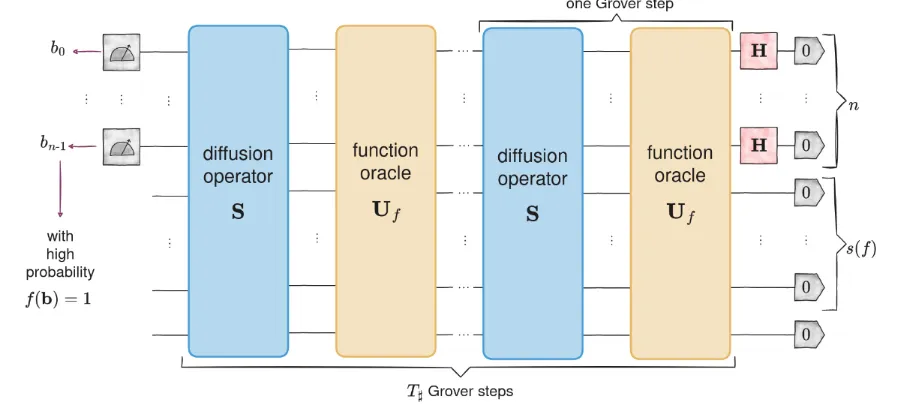

Put everything together to simulate a whole Amplitude Amplification Algorithm with the functions from above.

In [220]:
clauses_list = [[0, 2, 3], [0, 1, 3], [1, 2, 3]]
nsolutions = 1

In [221]:
n = np.max(clauses_list) + 1 
sf = len(clauses_list)
nqubits = n + sf + 1
oracle = build_oracle_exact_cover(clauses_list)
diffoperator = diffusion_operator(n, sf)

init_state = multikron(*[state_0] * nqubits)
sup_state = multikron(*pad_1q_gates_Is(nqubits, [H] * n, range(n))) @ init_state # Create superposition.

T_sharp = compute_amplification_steps(2 ** n, nsolutions)

for i in range(T_sharp):
    sup_state = oracle @ sup_state
    sup_state = diffoperator @ sup_state

final_state = collaps_state_multi(sup_state, [0] * (sf + 1), [1] * (sf + 1), range(n, nqubits))

In [223]:
final_state.shape

(16, 1)

In [227]:
nqubits, n, np.max(clauses_list)

(8, 4, 3)